# 1. Imports y setup
La notebook requiere las librerias basemap y la ultima version de matplotlib instaladas para que puedan correrse algunos de los graficos.

In [1]:
#para poner un mapa de la zona como fondo
!pip install basemap
#actualizo matplotlib a la ultima version porque me facilita el codigo del 3er grafico.
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import textwrap
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.basemap import Basemap #Para poner el mapa de fondo
from IPython.display import Markdown as md
from math import pi

warnings.filterwarnings("ignore", category=FutureWarning) #ignorar unos carteles de pandas.
pd.set_option('display.max_columns', None)

churn_ds = pd.read_csv('https://github.com/Lemonpi3/datasets-coderhouse/blob/main/telecom_customer_churn.csv?raw=true')
churned_users = churn_ds.loc[churn_ds['Customer Status']=='Churned']
stayed_users = churn_ds[churn_ds['Customer Status']=='Stayed']

churn_stayed_df= churn_ds[churn_ds['Customer Status']!='Joined']

# 2. Funciones utils y helpers

In [3]:
def plot_scatter_map(df, alpha=0.7, title='', ax=None , marcar_ciudades=True):
  '''
  Dibuja un scatter con el mapa de california
  Parametros:
  df: el dataframe ya filtrado (usa la latitud y longitud)
  alpha: transparencia de los puntitos. Por defecto es 0.7
  title: titulo del grafico (requiere pasar ax)
  ax: el axis de matplotlib
  marcar_ciudades: si es igual a True marca las ciudades de Sacramento, San Fracisco 
  ,Los Angeles y San Diego (True por defecto, requiere pasar ax)
  
  retorna==>> dibuja el mapa la ubicacion de las lineas del dataframe seleccionadas.
  '''
  m = Basemap(projection='lcc', resolution='i', 
              lat_0=37.5, lon_0=-119,
              width=1E6, height=1.2E6, ax=ax)

  m.drawcoastlines(color='gray')
  m.drawcountries(color='gray')
  m.drawstates(color='gray')
  m.drawlsmask(ocean_color='lightblue')
  m.drawcounties()

  lat = df['Latitude'].values
  lon = df['Longitude'].values

  if marcar_ciudades and m.ax:
    x, y = m(-117.16,32.71)
    m.ax.annotate('• San Diego', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
    x, y = m(-121.49,38.58)
    m.ax.annotate(f'• Sacramento', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
    x, y = m(-118.24,34.05)
    m.ax.annotate(f'• Los Angeles', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
    x, y = m(-122.41,37.77)
    m.ax.annotate(f'• San Francisco', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)

  ax.set_title(title)
  m.scatter(lon, lat, latlon=True,
          alpha=alpha)

In [4]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [5]:
def series_to_markdown_table(serie,print_out=True):
  '''crea una tabla de markdown con una serie de pandas'''
  
  out = '|            |              |\n| :---       |         ---: |\n'
  for index,value in zip(serie.index , serie.values):
    out = out + f'| {index} |  {value}  |\n'
  if print_out:
    print(out)

In [6]:
#codigo para latabla markdown de distribution (3er grafico de distribucion espacial de churned) esta comentado pq lo q imprimia era solo para copiar y pegar
# cols = []
# for county in distribution['County'].unique():
#   col = []
#   col.append(f'{county}')
#   col.append(':---')
#   cond = distribution['County']==county
#   for value in distribution[cond][['Churn Reason','%']].set_index('Churn Reason').sort_values('Churn Reason').values:
#     col.append(f'{round(value[0],4)}')
#     col.append('')
#   cols.append(col)
# for i in range(34):
#   if i%2==0 and i > 1:
#     header = [col_[i] for col_ in cols]

#     print('|' + distribution[cond][['Churn Reason','%']].set_index('Churn Reason').sort_values('Churn Reason').index[i/2] + '|'+'|'.join(header))
#   elif i == 0:
#     header = [col_[i] for col_ in cols]

#     print('|Churn Reason'+'|'+'|'.join(header))
#   elif i == 1:
#     print('|:---'*16)

In [7]:
#Colores y decoradores para los print
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [8]:
# categories=list(churn_category_percent_df)[0:]
# N = len(categories)
# N

# values=churn_category_percent_df.values.flatten().tolist()
# values += values[:1]
# values

# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]

# fig, ax = plt.subplots(figsize=(8,8))
# # Initialise the spider plot
# ax = plt.subplot(111, polar=True)
 
# # Draw one axe per variable + add labels
# plt.xticks(angles[:-1], categories, color='grey', size=8)

# ax.set_rlabel_position(0)
# plt.yticks([10,20,30,40,50,60], ["10","20","30","40","50","60"], color="grey", size=7)
# plt.ylim(0,50)
 
# # Plot data
# ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# # Fill area
# ax.fill(angles, values, 'b', alpha=0.3)

# # Show the graph
# plt.show()

# 3. Info del Dataset

La data proviene de una compania de telecomunicaciones en California en el
 Q2 2022

In [9]:
#@title Breve info de que se trata cada columna

* **Customer Status:** Si el cliente sigue en el servicio, se unió o lo dejó (churned)
* **Churn Category:** La categoria del porque lo dejo (por ejemplo: Dissatisfaction, Competitor, etc). Es la mas importante de las 2 columnas.
* **Churn Reason:** La razon especifica del cliente de por que dejo el servicio.
* **Gender, Age, Married, Number of Dependents:** Datos personales de como es la persona , si esta casada o no y con cuanta gente vive.
* **City, Zip Code, Latitude, Longitude:** En que parte del estado vive el cliente.
* **Number of Referrals, Tenure in Months:** A cuanta gente le recomendo el servicio y cuantos meses lleva con el servicio (tenure)
* **Offer, Phone Service, Multiple Lines, Avg Monthly Long Distance Charges:** El plan que el cliente esta usando , si opto por usar el servicio telefonico en su casa, si tiene multiples lineas telefónicas y el gasto mensual promedio en llamadas a larga distancia (si el cliente no esta subscripto al servicio telefonico el valor es 0)
* **Internet Service, Internet Type, Avg Monthly GB Download:** Datos relacionados al servicio del internet, si no contrató el servicio de internet el tipo de internet  esta como nulo y los GBs promedio tendran un valor igual a 0.
* **Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data:** Indican si optaron o no por cada uno de esos servicios.
* **Contract, Paperless Billing, Payment Method, Monthly Charge:** La forma y metodo de pago que eligio el cliente y cuanto se le cobra mensualmente.
* **Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue:** Gastos y reembolsos totales. Total revenue indica cuanto gano la empresa con este cliente.

El dataset fue sacado de kaggle <a href="https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics">(Link)</a>

In [10]:
#@title Info columnas
churn_ds.info(False)
#@markdown  |#   | Column                         |Non-Null Count  |Dtype  |
#@markdown |---  |------                             |--------------  |-----  |
#@markdown | 0   |Customer ID                        |7043 non-null|object |
#@markdown | 1   |Gender                             |7043 non-null|object |
#@markdown | 2   |Age                                |7043 non-null|   int64  |
#@markdown | 3   |Married                            |7043 non-null|object |
#@markdown | 4   |Number of Dependents               |7043 non-null   int64  |
#@markdown | 5   |City                               |7043 non-null|object |
#@markdown | 6   |Zip Code                           |7043 non-null   int64  |
#@markdown | 7   |Latitude                           |7043 non-null|float64|
#@markdown | 8   |Longitude                          |7043 non-null|float64|
#@markdown | 9   |Number of Referrals                |7043 non-null |  int64  |
#@markdown | 10  |Tenure in Months                   |7043 non-null |  int64  |
#@markdown | 11  |Offer                              |7043 non-null|object |
#@markdown | 12  |Phone Service                      |7043 non-null|object |
#@markdown | 13  |Avg Monthly Long Distance Charges  |6361 non-null|float64|
#@markdown | 14  |Multiple Lines                     |6361 non-null|object |
#@markdown | 15  |Internet Service                   |7043 non-null|object |
#@markdown | 16  |Internet Type                      |5517 non-null|object |
#@markdown | 17  |Avg Monthly GB Download            |5517 non-null|float64|
#@markdown | 18  |Online Security                    |5517 non-null|object |
#@markdown | 19  |Online Backup                      |5517 non-null|object |
#@markdown  |20  |Device Protection Plan             |5517 non-null|object |
#@markdown | 21  |Premium Tech Support               |5517 non-null|object |
#@markdown | 22  |Streaming TV                       |5517 non-null|object |
#@markdown  |23  |Streaming Movies                   |5517 non-null|object |
#@markdown | 24  |Streaming Music                    |5517 non-null|object |
#@markdown | 25  |Unlimited Data                     |5517 non-null|object |
#@markdown | 26  |Contract                           |7043 non-null|object |
#@markdown | 27  |Paperless Billing                  |7043 non-null|object |
#@markdown  |28  |Payment Method                     |7043 non-null|object |
#@markdown  |29  |Monthly Charge                     |7043 non-null|float64|
#@markdown  |30  |Total Charges                      |7043 non-null|float64|
#@markdown  |31  |Total Refunds                      |7043 non-null|float64|
#@markdown | 32  |Total Extra Data Charges           |7043 non-null|   int64  |
#@markdown | 33  |Total Long Distance Charges        |7043 non-null|float64|
#@markdown | 34  |Total Revenue                      |7043 non-null|float64|
#@markdown | 35  |Customer Status                    |7043 non-null|object |
#@markdown | 36  |Churn Category                     |1869 non-null|object |
#@markdown | 37  |Churn Reason                       |1869 non-null|object |

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 38 entries, Customer ID to Churn Reason
dtypes: float64(9), int64(6), object(23)
memory usage: 2.0+ MB


  |#   |Column                             |Non-Null Count  |Dtype  |
|---  |------                             |--------------  |-----  |
| 0   |Customer ID                        |7043 non-null|object |
| 1   |Gender                             |7043 non-null|object |
| 2   |Age                                |7043 non-null|   int64  |
| 3   |Married                            |7043 non-null|object |
| 4   |Number of Dependents               |7043 non-null   int64  |
| 5   |City                               |7043 non-null|object |
| 6   |Zip Code                           |7043 non-null   int64  |
| 7   |Latitude                           |7043 non-null|float64|
| 8   |Longitude                          |7043 non-null|float64|
| 9   |Number of Referrals                |7043 non-null |  int64  |
| 10  |Tenure in Months                   |7043 non-null |  int64  |
| 11  |Offer                              |7043 non-null|object |
| 12  |Phone Service                      |7043 non-null|object |
| 13  |Avg Monthly Long Distance Charges  |6361 non-null|float64|
| 14  |Multiple Lines                     |6361 non-null|object |
| 15  |Internet Service                   |7043 non-null|object |
| 16  |Internet Type                      |5517 non-null|object |
| 17  |Avg Monthly GB Download            |5517 non-null|float64|
| 18  |Online Security                    |5517 non-null|object |
| 19  |Online Backup                      |5517 non-null|object |
 |20  |Device Protection Plan             |5517 non-null|object |
| 21  |Premium Tech Support               |5517 non-null|object |
| 22  |Streaming TV                       |5517 non-null|object |
 |23  |Streaming Movies                   |5517 non-null|object |
| 24  |Streaming Music                    |5517 non-null|object |
| 25  |Unlimited Data                     |5517 non-null|object |
| 26  |Contract                           |7043 non-null|object |
| 27  |Paperless Billing                  |7043 non-null|object |
 |28  |Payment Method                     |7043 non-null|object |
 |29  |Monthly Charge                     |7043 non-null|float64|
 |30  |Total Charges                      |7043 non-null|float64|
 |31  |Total Refunds                      |7043 non-null|float64|
| 32  |Total Extra Data Charges           |7043 non-null|   int64  |
| 33  |Total Long Distance Charges        |7043 non-null|float64|
| 34  |Total Revenue                      |7043 non-null|float64|
| 35  |Customer Status                    |7043 non-null|object |
| 36  |Churn Category                     |1869 non-null|object |
| 37  |Churn Reason                       |1869 non-null|object |

In [11]:
#@title Shape del dataset y cantidad de usuarios unicos.
unicos = churn_ds['Customer ID'].nunique()
md(f'Clientes Unicos: {unicos}\n--------\n## **Shape: {churn_ds.shape}**')

Clientes Unicos: 7043
--------
## **Shape: (7043, 38)**

In [12]:
#@title Cantidad de nulos
series_to_markdown_table(churn_ds.isna().sum(),False)
#@markdown |            |              |
#@markdown | :---       |         ---: |
#@markdown | Customer ID |  0  |
#@markdown | Gender |  0  |
#@markdown | Age |  0  |
#@markdown | Married |  0  |
#@markdown | Number of Dependents |  0  |
#@markdown | City |  0  |
#@markdown | Zip Code |  0  |
#@markdown | Latitude |  0  |
#@markdown | Longitude |  0  |
#@markdown | Number of Referrals |  0  |
#@markdown | Tenure in Months |  0  |
#@markdown | Offer |  0  |
#@markdown | Phone Service |  0  |
#@markdown | Avg Monthly Long Distance Charges |  682  |
#@markdown | Multiple Lines |  682  |
#@markdown | Internet Service |  0  |
#@markdown | Internet Type |  1526  |
#@markdown | Avg Monthly GB Download |  1526  |
#@markdown | Online Security |  1526  |
#@markdown | Online Backup |  1526  |
#@markdown | Device Protection Plan |  1526  |
#@markdown | Premium Tech Support |  1526  |
#@markdown | Streaming TV |  1526  |
#@markdown | Streaming Movies |  1526  |
#@markdown | Streaming Music |  1526  |
#@markdown | Unlimited Data |  1526  |
#@markdown | Contract |  0  |
#@markdown | Paperless Billing |  0  |
#@markdown | Payment Method |  0  |
#@markdown | Monthly Charge |  0  |
#@markdown | Total Charges |  0  |
#@markdown | Total Refunds |  0  |
#@markdown | Total Extra Data Charges |  0  |
#@markdown | Total Long Distance Charges |  0  |
#@markdown | Total Revenue |  0  |
#@markdown | Customer Status |  0  |
#@markdown | Churn Category |  5174  |
#@markdown | Churn Reason |  5174  |

In [13]:
#@title Cantidad de cada variable target.
series_to_markdown_table(churn_ds['Customer Status'].value_counts(),False)
#@markdown | Customer Status |    Amount          |
#@markdown | :---       |         ---: |
#@markdown | Stayed |  4720  |
#@markdown | Churned |  1869  |
#@markdown | Joined |  454  |

In [14]:
#@title Cantidad de cada variable target en %.
series_to_markdown_table((round(churn_ds['Customer Status'].value_counts(normalize=True) *100,4)), False)
#@markdown | Customer Status           |        %     |
#@markdown | :---       |         ---: |
#@markdown | Stayed |  67.0  |
#@markdown | Churned |  27.0  |
#@markdown | Joined |  6.0  |

# 4. Abstract

## Ganancias:
El total de ganancias del Q2 2022 fue de **$\\$$21371131.69**, las ganancias provenientes de los churned fueron de **$\\$$3684459.82** que equivale a **17.24%** de las ganancias totales.


## Info de los churned:
La ciudad que mas perdida causo fue San Diego con un 10% del total de perdidas por churned, seguido por Los Angeles con 4% del total.
Pero si lo vemos a una escala mas grande a nivel de condados en vez de ciudad podemos ver que los condados mas affectados fueron el de Los Angeles con el 18% y el de Sandiego con 14% representando juntos casi un 32% del total de las perdidas.
Otros condados relevantes fueron Orange, Riverside, Sacramento y Santa Clara que juntos suman alrededor del 15% del total.


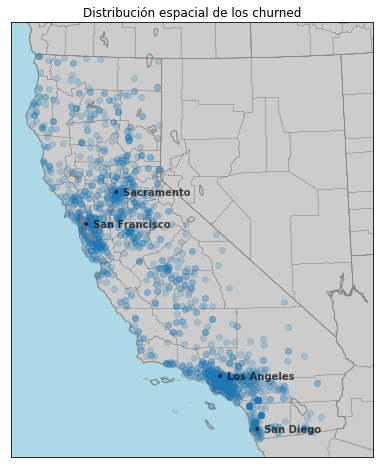

In [15]:
#@markdown
fig, ax = plt.subplots(figsize=(8,8))
plot_scatter_map(churned_users,title="Distribución espacial de los churned",alpha=0.2,ax = ax)

## Info causas de los churned:
La razon mas predominante de los churned en los 15 condados mas poblados del estado fue la competencia causando **46% de perdidas monetarias**, entre 30-70% de la cantidad de usuarios perdidos dependiendo del condado **y el 76% de los usuarios en San Diego**.
>
Dentro de esta categoria la mayoria es causada porque **la competencia ofrece mejores dispositivos y ofertas.**
>
Las otras 2 razones mas predominantes fueron las relacionadas con la **dissatisfación de los clientes y la actitud del soporte y proveedores.**
que son el **32% de las perdidas monetarias**
>
La actitud del soporte y proveedores es en general 15-35% de la cantidad de churned por condado.
>
Se puede observar en **Fresno, Orange, Kern, Ventura y San Bernandino** como los principales **con este problema** y San Diego, San Francisco y Sacramento donde este problema es minimo.
>
Por la disatisfacción de los clientes,este problema representa aproximadamente 15-30% de los churned en cada condado. En los unicos en los que no se presenta a gran tamaño es en San Diego y Kern y en los que peor impactan estas razones son Los Angeles, Contra Costa y San Bernandino.
>
Luego estan las otras causas , que son las que estan fuera de nuestro control o alcance como el fallecimiento de un cliente,se mudo o porque no quiso contestar, que son el 10% de las perdidas totales.

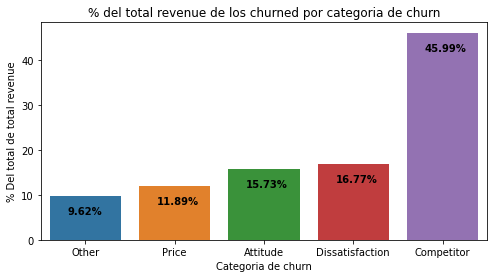

In [16]:
#@markdown
churn_category_percent = round(churned_users.groupby('Churn Category')['Total Revenue'].sum() / churned_users['Total Revenue'].sum() * 100,2)
churn_category_money = churned_users.groupby('Churn Category')['Total Revenue'].sum()

fig,ax=plt.subplots(figsize=(8,4))

g = sns.barplot(data=churn_category_percent, x=churn_category_percent.sort_values().index,y=churn_category_percent.sort_values().values, ax=ax)
g.set_xticklabels(churn_category_percent.sort_values().index)
g.set_ylabel('% Del total de total revenue')
g.set_xlabel('Categoria de churn')
g.set_title('% del total revenue de los churned por categoria de churn')
for i, v in enumerate(round(churn_category_percent.sort_values(),2).values):
    ax.text(i-0.2 ,v-4 , str(v)+'%', fontweight='bold')
plt.show()

Si bien, la que domina es la competencia la proporcion va variando por condado como se puede ver en este gráfico.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


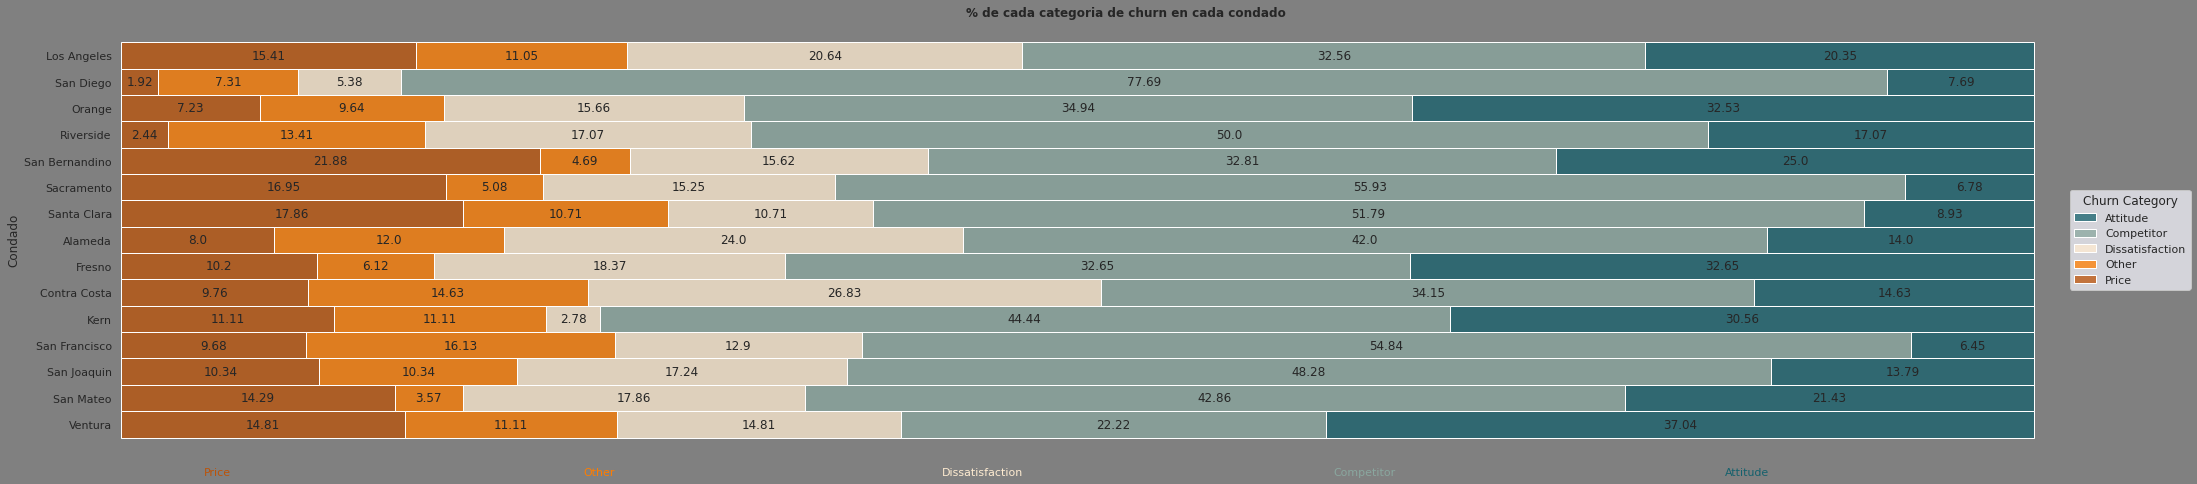

In [17]:
#@markdown
#las listas de las ciudades por condado las saque googleando

#https://geographic.org/streetview/usa/ca/san_diego/index.html
condado_san_diego = 'Alpine, Bonita, Bonsall, Borrego Springs, Boulevard, Camp Pendleton, Campo, Cardiff By The Sea, Carlsbad, Chula Vista, Coronado, Del Mar, Descanso, Dulzura, El Cajon, Encinitas, Escondido, Fallbrook, Guatay, Imperial Beach, Jacumba, Jamul, Julian, La Jolla, La Mesa, Lakeside, Lemon Grove, Mount Laguna, National City, Oceanside, Pala, Palomar Mountain, Pauma Valley, Pine Valley, Potrero, Poway, Ramona, Ranchita, Rancho Santa Fe, San Diego, San Luis Rey, San Marcos, San Ysidro, Santa Ysabel, Santee, Solana Beach, Spring Valley, Tecate, Valley Center, Vista, Warner Springs'
condado_san_diego = condado_san_diego.split(', ')

#https://geographic.org/streetview/usa/ca/los_angeles/index.html
condado_los_angeles = 'Acton, Agoura Hills, Alhambra, Altadena, Arcadia, Artesia, Avalon, Azusa, Baldwin Park, Bell Gardens, Bellflower, Beverly Hills, Burbank, Calabasas, Canoga Park, Canyon Country, Carson, Castaic, Cerritos, Chatsworth, Claremont, Compton, Covina, Culver City, Diamond Bar, Downey, Duarte, El Monte, El Segundo, Encino, Gardena, Glendale, Glendora, Granada Hills, Hacienda Heights, Harbor City, Hawaiian Gardens, Hawthorne, Hermosa Beach, Huntington Park, Inglewood, La Canada Flintridge, La Crescenta, La Mirada, La Puente, La Verne, Lake Hughes, Lakewood, Lancaster, Lawndale, Littlerock, Llano, Lomita, Long Beach, Los Angeles, Lynwood, Malibu, Manhattan Beach, Marina Del Rey, Maywood, Mission Hills, Monrovia, Montebello, Monterey Park, Montrose, Mount Wilson, Newhall, North Hills, North Hollywood, Northridge, Norwalk, Pacific Palisades, Pacoima, Palmdale, Palos Verdes Peninsula, Panorama City, Paramount, Pasadena, Pearblossom, Pico Rivera, Playa Del Rey, Playa Vista, Pomona, Porter Ranch, Rancho Palos Verdes, Redondo Beach, Reseda, Rosemead, Rowland Heights, San Dimas, San Fernando, San Gabriel, San Marino, San Pedro, Santa Clarita, Santa Fe Springs, Santa Monica, Sherman Oaks, Sierra Madre, Signal Hill, South El Monte, South Gate, South Pasadena, Stevenson Ranch, Studio City, Sun Valley, Sunland, Sylmar, Tarzana, Temple City, Topanga, Torrance, Tujunga, Valencia, Valley Village, Valyermo, Van Nuys, Venice, Verdugo City, Walnut, West Covina, West Hills, West Hollywood, Whittier, Wilmington, Winnetka, Woodland Hills'
condado_los_angeles = condado_los_angeles.split(', ')

#https://geographic.org/streetview/usa/ca/san_francisco/index.html
condado_san_francisco = ['San Francisco']

#https://geographic.org/streetview/usa/ca/sacramento/index.html
condado_sacramento = 'Antelope, Carmichael, Citrus Heights, Courtland, Elk Grove, Elverta, Fair Oaks, Folsom, Galt, Herald, Hood, Isleton, Mather, Mcclellan, North Highlands, Orangevale, Rancho Cordova, Rio Linda, Ryde, Sacramento, Sloughhouse, Walnut Grove, Wilton'
condado_sacramento = condado_sacramento.split(', ')

#https://geographic.org/streetview/usa/ca/santa_clara/index.html  (San jose se encuentra en este condado)
condado_santa_clara = 'Alviso, Campbell, Coyote, Cupertino, Gilroy, Holy City, Los Altos, Los Gatos, Milpitas, Morgan Hill, Mount Hamilton, Mountain View, Palo Alto, Redwood Estates, San Jose, San Martin, Santa Clara, Saratoga, Stanford, Sunnyvale'
condado_santa_clara = condado_santa_clara.split(', ')

#el top 5 solo me daba 40% de los churned, agrego mas condados.

#https://geographic.org/streetview/usa/ca/riverside/index.html
condado_riverside = 'Aguanga, Anza, Banning, Beaumont, Blythe, Cabazon, Calimesa, Cathedral City, Coachella, Corona, Desert Center, Desert Hot Springs, Hemet, Homeland, Idyllwild, Indian Wells, Indio, La Quinta, Lake Elsinore, Mecca, Menifee, Mira Loma, Moreno Valley, Mountain Center, Murrieta, Norco, North Palm Springs, Nuevo, Palm Desert, Palm Springs, Perris, Quail Valley, Rancho Mirage, Riverside, San Jacinto, Sun City, Temecula, Thermal, Thousand Palms, Whitewater, Wildomar, Winchester'
condado_riverside = condado_riverside.split(', ')

#https://geographic.org/streetview/usa/ca/alameda/index.html
condado_alameda = 'Alameda, Albany, Berkeley, Castro Valley, Dublin, Emeryville, Fremont, Hayward, Livermore, Newark, Oakland, Pleasanton, San Leandro, San Lorenzo, Sunol, Union City'
condado_alameda = condado_alameda.split(', ')

#https://geographic.org/streetview/usa/ca/fresno/index.html
condado_fresno = 'Auberry, Big Creek, Biola, Burrel, Cantua Creek, Caruthers, Clovis, Coalinga, Del Rey, Dunlap, Firebaugh, Five Points, Fowler, Fresno, Friant, Helm, Hume, Huron, Kerman, Kingsburg, Lakeshore, Laton, Mendota, Miramonte, Mono Hot Springs, Orange Cove, Parlier, Piedra, Prather, Raisin City, Reedley, Riverdale, San Joaquin, Sanger, Selma, Shaver Lake, Squaw Valley, Tollhouse, Tranquillity'
condado_fresno = condado_fresno.split(', ')

#https://geographic.org/streetview/usa/ca/orange/index.html
condado_orange = 'Aliso Viejo, Anaheim, Brea, Buena Park, Capistrano Beach, Corona Del Mar, Costa Mesa, Cypress, Dana Point, Foothill Ranch, Fountain Valley, Fullerton, Garden Grove, Huntington Beach, Irvine, La Habra, La Palma, Ladera Ranch, Laguna Beach, Laguna Hills, Laguna Niguel, Laguna Woods, Lake Forest, Los Alamitos, Midway City, Mission Viejo, Newport Beach, Newport Coast, Orange, Placentia, Rancho Santa Margarita, San Clemente, San Juan Capistrano, Santa Ana, Seal Beach, Silverado, Stanton, Sunset Beach, Surfside, Trabuco Canyon, Tustin, Villa Park, Westminster, Yorba Linda'
condado_orange = condado_orange.split(', ')

#https://geographic.org/streetview/usa/ca/san_bernardino/index.html
condado_san_bernandino = 'Adelanto, Amboy, Angelus Oaks, Apple Valley, Baker, Barstow, Big Bear City, Big Bear Lake, Bloomington, Blue Jay, Bryn Mawr, Cedar Glen, Cedarpines Park, Chino, Chino Hills, Cima, Colton, Crestline, Daggett, Earp, Essex, Fawnskin, Fontana, Forest Falls, Fort Irwin, Grand Terrace, Green Valley Lake, Guasti, Helendale, Hesperia, Highland, Hinkley, Joshua Tree, Lake Arrowhead, Landers, Loma Linda, Lucerne Valley, Ludlow, Lytle Creek, Mentone, Montclair, Morongo Valley, Mountain Pass, Mt Baldy, Needles, Newberry Springs, Nipton, Ontario, Oro Grande, Parker Dam, Phelan, Pinon Hills, Pioneertown, Rancho Cucamonga, Redlands, Rialto, Rimforest, Running Springs, San Bernardino, Skyforest, Sugarloaf, Trona, Twentynine Palms, Twin Peaks, Upland, Victorville, Vidal, Wrightwood, Yermo, Yucaipa, Yucca Valley'
condado_san_bernandino = condado_san_bernandino.split(', ')

#top 10 me daba 57%, quiero aprox 70%

#https://geographic.org/streetview/usa/ca/contra_costa/index.html
condado_contra_costa = 'Alamo, Antioch, Bethel Island, Brentwood, Byron, Canyon, Clayton, Concord, Crockett, Danville, Diablo, Discovery Bay, El Cerrito, El Sobrante, Hercules, Knightsen, Lafayette, Martinez, Moraga, Oakley, Orinda, Pinole, Pittsburg, Pleasant Hill, Port Costa, Richmond, Rodeo, San Pablo, San Ramon, Walnut Creek'
condado_contra_costa = condado_contra_costa.split(', ')

#https://geographic.org/streetview/usa/ca/kern/index.html
condado_kern = 'Arvin, Bakersfield, Bodfish, Boron, Buttonwillow, Caliente, California City, Cantil, Delano, Edison, Edwards, Fellows, Frazier Park, Glennville, Inyokern, Johannesburg, Keene, Kernville, Lake Isabella, Lamont, Lebec, Lost Hills, Maricopa, Mc Farland, Mc Kittrick, Mojave, Onyx, Pine Mountain Club, Randsburg, Red Mountain, Ridgecrest, Rosamond, Shafter, Taft, Tehachapi, Tupman, Wasco, Weldon, Wofford Heights, Woody'
condado_kern = condado_kern.split(', ')

#https://geographic.org/streetview/usa/ca/ventura/index.html
condado_ventura = 'Camarillo, Fillmore, Moorpark, Newbury Park, Oak Park, Oak View, Ojai, Oxnard, Piru, Port Hueneme, Santa Paula, Simi Valley, Somis, Thousand Oaks, Ventura, Westlake Village'
condado_ventura = condado_ventura.split(', ')

#https://geographic.org/streetview/usa/ca/san_mateo/index.html
condado_san_mateo = 'Atherton, Belmont, Brisbane, Burlingame, Daly City, El Granada, Half Moon Bay, La Honda, Loma Mar, Menlo Park, Millbrae, Montara, Moss Beach, Pacifica, Pescadero, Portola Valley, Redwood City, San Bruno, San Carlos, San Francisco, San Gregorio, San Mateo, South San Francisco'
condado_san_mateo = condado_san_mateo.split(', ')

#https://geographic.org/streetview/usa/ca/san_joaquin/index.html
condado_san_joaquin = 'Acampo, Clements, Escalon, Farmington, French Camp, Holt, Lathrop, Linden, Lockeford, Lodi, Manteca, Ripon, Stockton, Thornton, Tracy, Vernalis, Victor, Woodbridge'
condado_san_joaquin = condado_san_joaquin.split(', ')

top_15_condados = condado_san_diego + condado_los_angeles + condado_san_francisco + condado_sacramento + condado_santa_clara + condado_riverside + condado_alameda + condado_fresno + condado_orange + condado_san_bernandino + condado_contra_costa + condado_kern + condado_ventura +condado_san_mateo + condado_san_joaquin

cond = churned_users['City'].isin(top_15_condados)
temp_df = churned_users.loc[cond].copy()

def get_county(value):
  if value in condado_san_diego:
    return 'San Diego'
  elif value in condado_los_angeles:
    return 'Los Angeles'
  elif value in condado_sacramento:
    return 'Sacramento'
  elif value in condado_san_francisco:
    return 'San Francisco'
  elif value in condado_santa_clara:
    return 'Santa Clara'
  elif value in condado_riverside:
    return 'Riverside'
  elif value in condado_alameda:
    return 'Alameda'
  elif value in condado_fresno:
    return 'Fresno'
  elif value in condado_orange:
    return 'Orange'
  elif value in condado_san_bernandino:
    return 'San Bernandino'
  elif value in condado_contra_costa:
    return 'Contra Costa'
  elif value in condado_kern:
    return 'Kern'
  elif value in condado_ventura:
    return 'Ventura'
  elif value in condado_san_mateo:
    return 'San Mateo'
  elif value in condado_san_joaquin:
    return 'San Joaquin'
  else:
    print(f'No se pudo sacar el condado de {value}')

temp_df['County'] = temp_df['City'].apply(get_county)

#Calculo los % por categoria y los sorteo en el orden de sorter que es el orden por cantidad de churned en los condados de mayor a menor.
# cond = (temp_df['Churn Reason'] != 'Moved') & (temp_df['Churn Reason'] != 'Deceased') & (temp_df['Churn Reason'] !="Don't know")

distribution = pd.crosstab(temp_df['County'], temp_df[cond]['Churn Category'], normalize='index')  #me da un stack en 2d
distribution = distribution.stack().reset_index(name='%') #lo hace 1 dimención

#Sorting

sorter = ['Los Angeles', 'San Diego', 'Orange', 'Riverside',
       'San Bernandino', 'Sacramento', 'Santa Clara', 'Alameda', 'Fresno',
       'Contra Costa', 'Kern', 'San Francisco', 'San Joaquin',
       'San Mateo', 'Ventura']

#cambio el tipo de la columna a categoria para poder sortearla
distribution.County = distribution.County.astype("category")
distribution.County.cat.set_categories(sorter, inplace=True)
distribution.sort_values(['County','Churn Category'], inplace = True,ascending=(True,True))

#devuelvo al tipo que era antes para seguir usandola
distribution.County = distribution.County.astype("object")

#convierto los valores a % de 2 decimales
distribution['%'] = distribution['%'] * 100

#Uso una paleta custom porque las que venian con seaborn no me daban el contraste correcto para ver con facilidad la distribucion, mas que nada es por la cantidad de clases.
#No incluyo las razones Moved, Don't known, Deceased porque son cosas que no se pueden controlar y porque quiero simplificar lo mas posible el grafico.

colors =["#15616d","#8aa79f","#ffecd1","#ff7d00","#bc5308"]

#@title
GRAFICO_A_COLOR = True #@param {type:'boolean'}
#colores del grafico, mas que nada para el fondo ya que interferia con el color de lox xticks
sns.set_style("dark")
sns.set(rc={'figure.facecolor':'gray','figure.facecolor':'gray'})


fig,ax=plt.subplots(1,1,figsize=(36,8))

g = sns.histplot(data= distribution,
            y='County', hue='Churn Category',weights='%',
            palette = sns.color_palette(colors,desat=GRAFICO_A_COLOR),
            legend=True,
            multiple = 'stack',
           )

#pongo los % en las cajas con mas de 1.2%
for c in g.containers:
    labels = [round(v.get_width(),2) if v.get_width() > 1.2 else '' for v in c]
    g.bar_label(c, labels=labels, label_type='center')


g.set_title('% de cada categoria de churn en cada condado',fontdict={
 'fontweight': 'bold',
})

g.set_ylabel('Condado')
#cambio los ticks numericos por las clases para tener una referencia de donde esta 
#cada razon.
g.set_xlabel('')
# g.set_xticks(range(2,100,6),labels=distribution['Churn Category'].unique()[::-1],rotation=0)
g.set_xticks(range(5,105,20),labels=distribution['Churn Category'].unique()[::-1],rotation=0)

# wrap_labels(ax, 10)

#les pongo el color para que ayude a referenciar con el color de cada caja
for i,tick_label in enumerate(g.axes.get_xticklabels()):
    tick_label.set_color(sns.color_palette(colors,desat=GRAFICO_A_COLOR)[-1::-1][i])

#quito unas partes blancas que habian quedado y los ejes
g.set_facecolor('gray')
g.grid(visible=False)
sns.despine(left=True,bottom=True)

#acomodo la leyenda a la derecha por fuera del grafico
sns.move_legend(ax,bbox_to_anchor=(1, 0.5),loc=10)

plt.show()
#reseteo los estilos de seaborn
sns.set_style("white")
plt.show()

**Cantidad porcentual de cada razon de churn por condado**

|Churn Reason|Los Angeles|San Diego|Orange|Riverside|San Bernandino|Sacramento|Santa Clara|Alameda|Fresno|Contra Costa|Kern|San Francisco|San Joaquin|San Mateo|Ventura
|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---
|Attitude of support person|1.9608|2.4896|13.3333|5.6338|9.8361|3.5714|2.0|0.0|17.3913|5.7143|15.625|0.0|7.6923|7.4074|12.5
|Competitor had better devices|20.915|5.8091|22.6667|14.0845|16.3934|3.5714|8.0|15.9091|17.3913|11.4286|18.75|7.6923|7.6923|14.8148|29.1667
|Competitor made better offer|18.9542|4.5643|20.0|15.493|29.5082|21.4286|24.0|27.2727|15.2174|14.2857|31.25|23.0769|26.9231|22.2222|8.3333
|Competitor offered higher download speeds|5.2288|76.7635|6.6667|30.9859|1.6393|10.7143|10.0|6.8182|10.8696|11.4286|3.125|11.5385|7.6923|11.1111|4.1667
|Competitor offered more data|6.2092|1.2448|6.6667|4.2254|1.6393|16.0714|10.0|4.5455|4.3478|8.5714|12.5|15.3846|7.6923|0.0|4.1667
|Extra data charges|6.2092|1.2448|5.3333|7.0423|1.6393|10.7143|14.0|9.0909|4.3478|5.7143|3.125|15.3846|11.5385|11.1111|8.3333
|Lack of affordable download/upload speed|4.5752|0.4149|1.3333|0.0|3.2787|7.1429|2.0|4.5455|4.3478|2.8571|3.125|3.8462|0.0|0.0|4.1667
|Lack of self-service on Website|2.6144|0.0|1.3333|0.0|3.2787|3.5714|2.0|0.0|2.1739|0.0|0.0|0.0|0.0|0.0|4.1667
|Limited range of services|1.634|1.2448|2.6667|1.4085|1.6393|0.0|2.0|2.2727|2.1739|2.8571|0.0|0.0|3.8462|0.0|0.0
|Long distance charges|3.5948|0.4149|1.3333|2.8169|1.6393|3.5714|2.0|2.2727|0.0|8.5714|0.0|0.0|0.0|3.7037|4.1667
|Network reliability|4.2484|0.8299|2.6667|0.0|8.1967|1.7857|2.0|2.2727|2.1739|2.8571|3.125|0.0|7.6923|3.7037|4.1667
|Poor expertise of online support|5.5556|0.4149|4.0|5.6338|3.2787|1.7857|2.0|2.2727|4.3478|11.4286|0.0|3.8462|0.0|3.7037|4.1667
|Poor expertise of phone support|1.3072|1.6598|1.3333|1.4085|0.0|1.7857|0.0|4.5455|0.0|0.0|3.125|0.0|0.0|0.0|0.0
|Price too high|0.6536|0.0|0.0|0.0|0.0|0.0|0.0|4.5455|0.0|0.0|0.0|0.0|0.0|0.0|0.0
|Product dissatisfaction|5.8824|0.8299|2.6667|2.8169|8.1967|5.3571|14.0|2.2727|2.1739|5.7143|6.25|7.6923|3.8462|11.1111|4.1667
|Service dissatisfaction|5.5556|1.6598|4.0|7.0423|6.5574|1.7857|2.0|6.8182|8.6957|2.8571|0.0|7.6923|7.6923|3.7037|4.1667

# 5. Preguntas e insights

## Distribución espacial de los churned

Esta sección habla de donde hay mas cantidad de churned y que razones son las que predominan en cada zona relevante.

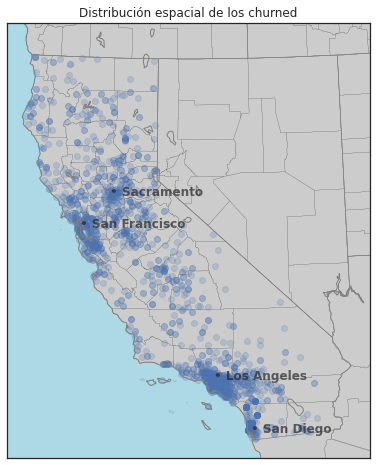

In [18]:
#@title ¿Hay alguna ciudad o area donde haya mas churned que el resto, o algún patron en la ubicación de los churned?
fig, ax = plt.subplots(figsize=(8,8))
plot_scatter_map(churned_users,title="Distribución espacial de los churned",alpha=0.2,ax = ax)

Parece que los focos con mas churned son cerca las ciudades mas importantes del estado, como era de esperarse ya que son las zonas mas pobladas. Veamos si hay tendencias entre ciertos motivos de churn en alguna ciudad o condado en especifico.

In [19]:
#@markdown Como las ciudades en si tienen muy poco % de representación y en el scatter se muestra que hay valores cercanos a ellas que no son de las ciudades voy a segmentar los churned por los condados mas poblados a los cuales pertenecen las ciudades en las que estan para tratar de tener una cantidad representativa.
#las listas de las ciudades por condado las saque googleando

#https://geographic.org/streetview/usa/ca/san_diego/index.html
condado_san_diego = 'Alpine, Bonita, Bonsall, Borrego Springs, Boulevard, Camp Pendleton, Campo, Cardiff By The Sea, Carlsbad, Chula Vista, Coronado, Del Mar, Descanso, Dulzura, El Cajon, Encinitas, Escondido, Fallbrook, Guatay, Imperial Beach, Jacumba, Jamul, Julian, La Jolla, La Mesa, Lakeside, Lemon Grove, Mount Laguna, National City, Oceanside, Pala, Palomar Mountain, Pauma Valley, Pine Valley, Potrero, Poway, Ramona, Ranchita, Rancho Santa Fe, San Diego, San Luis Rey, San Marcos, San Ysidro, Santa Ysabel, Santee, Solana Beach, Spring Valley, Tecate, Valley Center, Vista, Warner Springs'
condado_san_diego = condado_san_diego.split(', ')

#https://geographic.org/streetview/usa/ca/los_angeles/index.html
condado_los_angeles = 'Acton, Agoura Hills, Alhambra, Altadena, Arcadia, Artesia, Avalon, Azusa, Baldwin Park, Bell Gardens, Bellflower, Beverly Hills, Burbank, Calabasas, Canoga Park, Canyon Country, Carson, Castaic, Cerritos, Chatsworth, Claremont, Compton, Covina, Culver City, Diamond Bar, Downey, Duarte, El Monte, El Segundo, Encino, Gardena, Glendale, Glendora, Granada Hills, Hacienda Heights, Harbor City, Hawaiian Gardens, Hawthorne, Hermosa Beach, Huntington Park, Inglewood, La Canada Flintridge, La Crescenta, La Mirada, La Puente, La Verne, Lake Hughes, Lakewood, Lancaster, Lawndale, Littlerock, Llano, Lomita, Long Beach, Los Angeles, Lynwood, Malibu, Manhattan Beach, Marina Del Rey, Maywood, Mission Hills, Monrovia, Montebello, Monterey Park, Montrose, Mount Wilson, Newhall, North Hills, North Hollywood, Northridge, Norwalk, Pacific Palisades, Pacoima, Palmdale, Palos Verdes Peninsula, Panorama City, Paramount, Pasadena, Pearblossom, Pico Rivera, Playa Del Rey, Playa Vista, Pomona, Porter Ranch, Rancho Palos Verdes, Redondo Beach, Reseda, Rosemead, Rowland Heights, San Dimas, San Fernando, San Gabriel, San Marino, San Pedro, Santa Clarita, Santa Fe Springs, Santa Monica, Sherman Oaks, Sierra Madre, Signal Hill, South El Monte, South Gate, South Pasadena, Stevenson Ranch, Studio City, Sun Valley, Sunland, Sylmar, Tarzana, Temple City, Topanga, Torrance, Tujunga, Valencia, Valley Village, Valyermo, Van Nuys, Venice, Verdugo City, Walnut, West Covina, West Hills, West Hollywood, Whittier, Wilmington, Winnetka, Woodland Hills'
condado_los_angeles = condado_los_angeles.split(', ')

#https://geographic.org/streetview/usa/ca/san_francisco/index.html
condado_san_francisco = ['San Francisco']

#https://geographic.org/streetview/usa/ca/sacramento/index.html
condado_sacramento = 'Antelope, Carmichael, Citrus Heights, Courtland, Elk Grove, Elverta, Fair Oaks, Folsom, Galt, Herald, Hood, Isleton, Mather, Mcclellan, North Highlands, Orangevale, Rancho Cordova, Rio Linda, Ryde, Sacramento, Sloughhouse, Walnut Grove, Wilton'
condado_sacramento = condado_sacramento.split(', ')

#https://geographic.org/streetview/usa/ca/santa_clara/index.html  (San jose se encuentra en este condado)
condado_santa_clara = 'Alviso, Campbell, Coyote, Cupertino, Gilroy, Holy City, Los Altos, Los Gatos, Milpitas, Morgan Hill, Mount Hamilton, Mountain View, Palo Alto, Redwood Estates, San Jose, San Martin, Santa Clara, Saratoga, Stanford, Sunnyvale'
condado_santa_clara = condado_santa_clara.split(', ')

#el top 5 solo me daba 40% de los churned, agrego mas condados.

#https://geographic.org/streetview/usa/ca/riverside/index.html
condado_riverside = 'Aguanga, Anza, Banning, Beaumont, Blythe, Cabazon, Calimesa, Cathedral City, Coachella, Corona, Desert Center, Desert Hot Springs, Hemet, Homeland, Idyllwild, Indian Wells, Indio, La Quinta, Lake Elsinore, Mecca, Menifee, Mira Loma, Moreno Valley, Mountain Center, Murrieta, Norco, North Palm Springs, Nuevo, Palm Desert, Palm Springs, Perris, Quail Valley, Rancho Mirage, Riverside, San Jacinto, Sun City, Temecula, Thermal, Thousand Palms, Whitewater, Wildomar, Winchester'
condado_riverside = condado_riverside.split(', ')

#https://geographic.org/streetview/usa/ca/alameda/index.html
condado_alameda = 'Alameda, Albany, Berkeley, Castro Valley, Dublin, Emeryville, Fremont, Hayward, Livermore, Newark, Oakland, Pleasanton, San Leandro, San Lorenzo, Sunol, Union City'
condado_alameda = condado_alameda.split(', ')

#https://geographic.org/streetview/usa/ca/fresno/index.html
condado_fresno = 'Auberry, Big Creek, Biola, Burrel, Cantua Creek, Caruthers, Clovis, Coalinga, Del Rey, Dunlap, Firebaugh, Five Points, Fowler, Fresno, Friant, Helm, Hume, Huron, Kerman, Kingsburg, Lakeshore, Laton, Mendota, Miramonte, Mono Hot Springs, Orange Cove, Parlier, Piedra, Prather, Raisin City, Reedley, Riverdale, San Joaquin, Sanger, Selma, Shaver Lake, Squaw Valley, Tollhouse, Tranquillity'
condado_fresno = condado_fresno.split(', ')

#https://geographic.org/streetview/usa/ca/orange/index.html
condado_orange = 'Aliso Viejo, Anaheim, Brea, Buena Park, Capistrano Beach, Corona Del Mar, Costa Mesa, Cypress, Dana Point, Foothill Ranch, Fountain Valley, Fullerton, Garden Grove, Huntington Beach, Irvine, La Habra, La Palma, Ladera Ranch, Laguna Beach, Laguna Hills, Laguna Niguel, Laguna Woods, Lake Forest, Los Alamitos, Midway City, Mission Viejo, Newport Beach, Newport Coast, Orange, Placentia, Rancho Santa Margarita, San Clemente, San Juan Capistrano, Santa Ana, Seal Beach, Silverado, Stanton, Sunset Beach, Surfside, Trabuco Canyon, Tustin, Villa Park, Westminster, Yorba Linda'
condado_orange = condado_orange.split(', ')

#https://geographic.org/streetview/usa/ca/san_bernardino/index.html
condado_san_bernandino = 'Adelanto, Amboy, Angelus Oaks, Apple Valley, Baker, Barstow, Big Bear City, Big Bear Lake, Bloomington, Blue Jay, Bryn Mawr, Cedar Glen, Cedarpines Park, Chino, Chino Hills, Cima, Colton, Crestline, Daggett, Earp, Essex, Fawnskin, Fontana, Forest Falls, Fort Irwin, Grand Terrace, Green Valley Lake, Guasti, Helendale, Hesperia, Highland, Hinkley, Joshua Tree, Lake Arrowhead, Landers, Loma Linda, Lucerne Valley, Ludlow, Lytle Creek, Mentone, Montclair, Morongo Valley, Mountain Pass, Mt Baldy, Needles, Newberry Springs, Nipton, Ontario, Oro Grande, Parker Dam, Phelan, Pinon Hills, Pioneertown, Rancho Cucamonga, Redlands, Rialto, Rimforest, Running Springs, San Bernardino, Skyforest, Sugarloaf, Trona, Twentynine Palms, Twin Peaks, Upland, Victorville, Vidal, Wrightwood, Yermo, Yucaipa, Yucca Valley'
condado_san_bernandino = condado_san_bernandino.split(', ')

#top 10 me daba 57%, quiero aprox 70%

#https://geographic.org/streetview/usa/ca/contra_costa/index.html
condado_contra_costa = 'Alamo, Antioch, Bethel Island, Brentwood, Byron, Canyon, Clayton, Concord, Crockett, Danville, Diablo, Discovery Bay, El Cerrito, El Sobrante, Hercules, Knightsen, Lafayette, Martinez, Moraga, Oakley, Orinda, Pinole, Pittsburg, Pleasant Hill, Port Costa, Richmond, Rodeo, San Pablo, San Ramon, Walnut Creek'
condado_contra_costa = condado_contra_costa.split(', ')

#https://geographic.org/streetview/usa/ca/kern/index.html
condado_kern = 'Arvin, Bakersfield, Bodfish, Boron, Buttonwillow, Caliente, California City, Cantil, Delano, Edison, Edwards, Fellows, Frazier Park, Glennville, Inyokern, Johannesburg, Keene, Kernville, Lake Isabella, Lamont, Lebec, Lost Hills, Maricopa, Mc Farland, Mc Kittrick, Mojave, Onyx, Pine Mountain Club, Randsburg, Red Mountain, Ridgecrest, Rosamond, Shafter, Taft, Tehachapi, Tupman, Wasco, Weldon, Wofford Heights, Woody'
condado_kern = condado_kern.split(', ')

#https://geographic.org/streetview/usa/ca/ventura/index.html
condado_ventura = 'Camarillo, Fillmore, Moorpark, Newbury Park, Oak Park, Oak View, Ojai, Oxnard, Piru, Port Hueneme, Santa Paula, Simi Valley, Somis, Thousand Oaks, Ventura, Westlake Village'
condado_ventura = condado_ventura.split(', ')

#https://geographic.org/streetview/usa/ca/san_mateo/index.html
condado_san_mateo = 'Atherton, Belmont, Brisbane, Burlingame, Daly City, El Granada, Half Moon Bay, La Honda, Loma Mar, Menlo Park, Millbrae, Montara, Moss Beach, Pacifica, Pescadero, Portola Valley, Redwood City, San Bruno, San Carlos, San Francisco, San Gregorio, San Mateo, South San Francisco'
condado_san_mateo = condado_san_mateo.split(', ')

#https://geographic.org/streetview/usa/ca/san_joaquin/index.html
condado_san_joaquin = 'Acampo, Clements, Escalon, Farmington, French Camp, Holt, Lathrop, Linden, Lockeford, Lodi, Manteca, Ripon, Stockton, Thornton, Tracy, Vernalis, Victor, Woodbridge'
condado_san_joaquin = condado_san_joaquin.split(', ')

top_15_condados = condado_san_diego + condado_los_angeles + condado_san_francisco + condado_sacramento + condado_santa_clara + condado_riverside + condado_alameda + condado_fresno + condado_orange + condado_san_bernandino + condado_contra_costa + condado_kern + condado_ventura +condado_san_mateo + condado_san_joaquin

cond = churned_users['City'].isin(top_15_condados)
temp_df = churned_users.loc[cond].copy()

def get_county(value):
  if value in condado_san_diego:
    return 'San Diego'
  elif value in condado_los_angeles:
    return 'Los Angeles'
  elif value in condado_sacramento:
    return 'Sacramento'
  elif value in condado_san_francisco:
    return 'San Francisco'
  elif value in condado_santa_clara:
    return 'Santa Clara'
  elif value in condado_riverside:
    return 'Riverside'
  elif value in condado_alameda:
    return 'Alameda'
  elif value in condado_fresno:
    return 'Fresno'
  elif value in condado_orange:
    return 'Orange'
  elif value in condado_san_bernandino:
    return 'San Bernandino'
  elif value in condado_contra_costa:
    return 'Contra Costa'
  elif value in condado_kern:
    return 'Kern'
  elif value in condado_ventura:
    return 'Ventura'
  elif value in condado_san_mateo:
    return 'San Mateo'
  elif value in condado_san_joaquin:
    return 'San Joaquin'
  else:
    print(f'No se pudo sacar el condado de {value}')

temp_df['County'] = temp_df['City'].apply(get_county)

top_churned_cities = churned_users['City'].value_counts()
top_churned_counties = temp_df['County'].value_counts()
representation_of_county = top_churned_counties/len(churned_users) *100
representation_of_city = top_churned_cities/len(churned_users) * 100
representation_of_city_rounded = round(representation_of_city,2)

representacion_counties_percent = sum(top_churned_counties)/len(churned_users) * 100

print(f'% de representacion counties {round(representacion_counties_percent,2)}%') 

% de representacion counties 66.29%


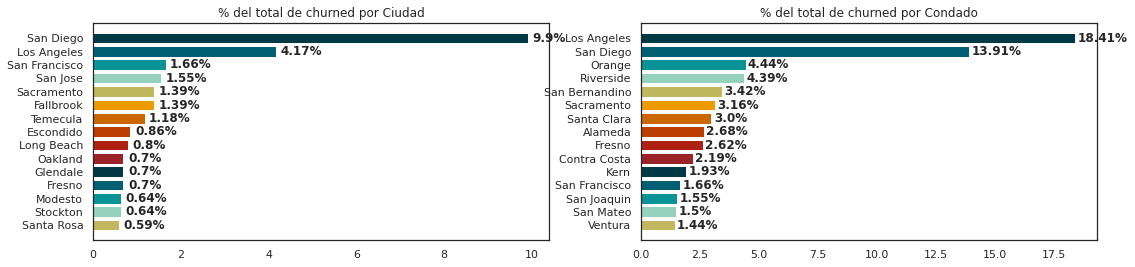

In [20]:
#@title ¿Que condados tienen mas churned y cuanto % del total tienen?
fig, ax = plt.subplots(1,2,figsize=(18,4))
ax=ax.flatten()

colors = ['#003946', '#005f73', '#0a9396', '#94d2bd', '#c1b75f', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

ax[0].barh(representation_of_city.index[:15],representation_of_city[:15],color=colors)
ax[0].set_title('% del total de churned por Ciudad')
ax[0].invert_yaxis()
for i, v in enumerate(round(representation_of_city[:15],2).values):
    ax[0].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

ax[1].set_title('% del total de churned por Condado')
ax[1].barh(representation_of_county.index[:15],representation_of_county[:15],color=colors)
ax[1].invert_yaxis()
for i, v in enumerate(round(representation_of_county[:15],2).values):
    ax[1].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

Los condados con mas churned son San Diego y Los Angeles, representando 30% aprox del total de churned.

Los top 15 condados en churned representan 66.29% del total, decidí no seguir agregando ya que cada condado que agregaba me estaba dando cada vez menos % del total

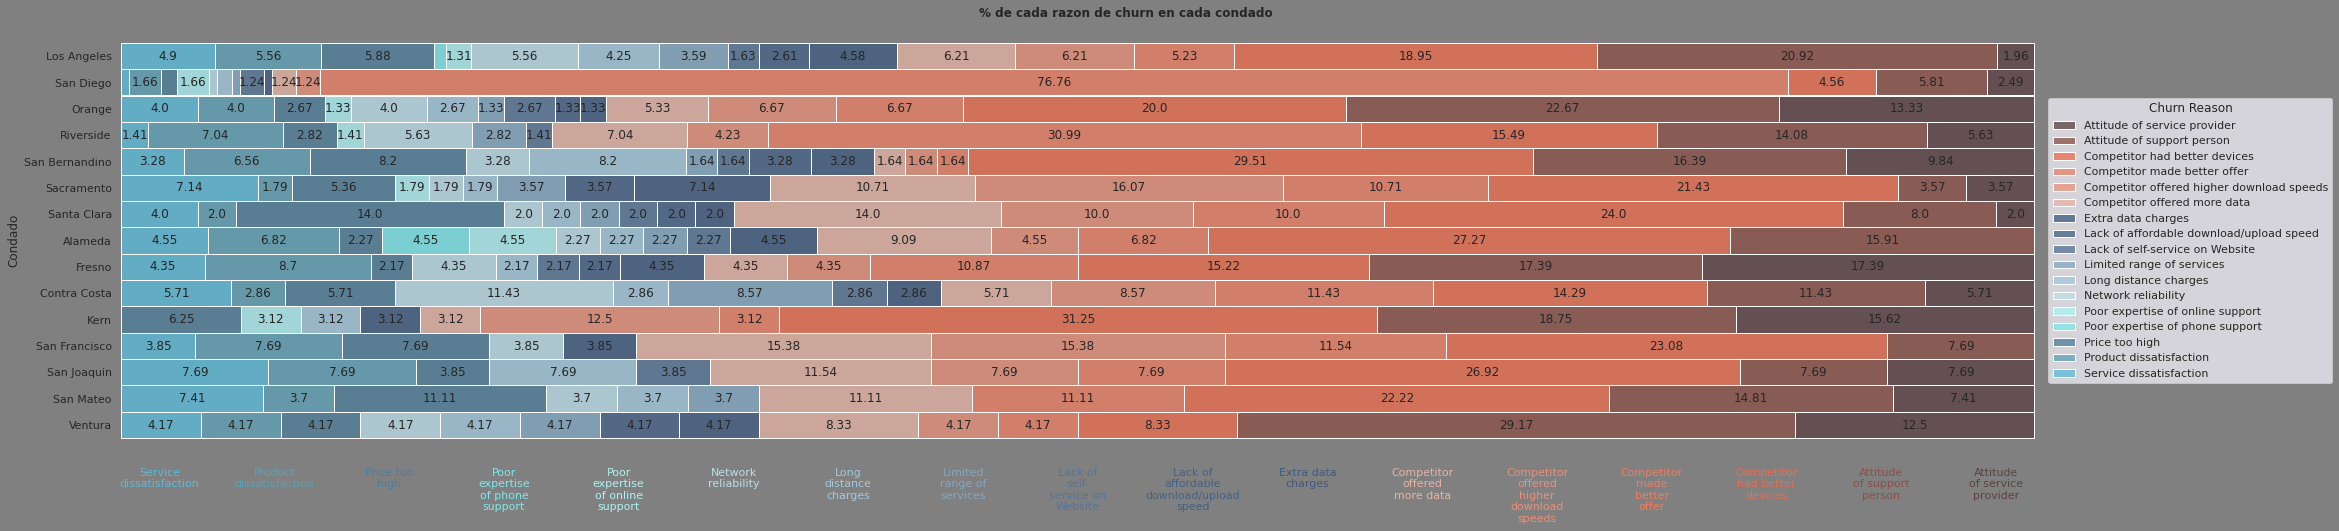

In [21]:
#@title ¿Que razones predominan en los 15 condados mas poblados del estado? { form-width: "10%" }
#Calculo los % por categoria y los sorteo en el orden de sorter que es el orden por cantidad de churned en los condados de mayor a menor.
cond = (temp_df['Churn Reason'] != 'Moved') & (temp_df['Churn Reason'] != 'Deceased') & (temp_df['Churn Reason'] !="Don't know")

distribution = pd.crosstab(temp_df[cond]['County'], temp_df[cond]['Churn Reason'], normalize='index')  #me da un stack en 2d
distribution = distribution.stack().reset_index(name='%') #lo hace 1 dimención

#Sorting

sorter = ['Los Angeles', 'San Diego', 'Orange', 'Riverside',
       'San Bernandino', 'Sacramento', 'Santa Clara', 'Alameda', 'Fresno',
       'Contra Costa', 'Kern', 'San Francisco', 'San Joaquin',
       'San Mateo', 'Ventura']

#cambio el tipo de la columna a categoria para poder sortearla
distribution.County = distribution.County.astype("category")
distribution.County.cat.set_categories(sorter, inplace=True)
distribution.sort_values(['County','Churn Reason'], inplace = True,ascending=(True,True))

#devuelvo al tipo que era antes para seguir usandola
distribution.County = distribution.County.astype("object")

#convierto los valores a % de 2 decimales
distribution['%'] = distribution['%'] * 100

#Uso una paleta custom porque las que venian con seaborn no me daban el contraste correcto para ver con facilidad la distribucion, mas que nada es por la cantidad de clases.
#@markdown No incluyo las razones Moved, Don't known, Deceased porque son cosas que no se pueden controlar y porque quiero simplificar lo mas posible el grafico.

colors =['#5B4144','#8C4F47',  #attitude
         '#EE6C4D','#ED7E63','#EB9079','#E7B4A5', #competitor
         '#3D5A80','#436186','#547497','#82A8C3','#A1C9DE','#BCDEEB','#ADF3F5','#7AEAEE','#4D7E9C','#5CA2B7','#59BBDC' #servicio/misc
         ]

#@title
GRAFICO_A_COLOR = True #@param {type:"boolean"}
#colores del grafico, mas que nada para el fondo ya que interferia con el color de lox xticks
sns.set_style("dark")
sns.set(rc={'figure.facecolor':'gray','figure.facecolor':'gray'})


fig,ax=plt.subplots(1,1,figsize=(36,8))

g = sns.histplot(data= distribution,
            y='County', hue='Churn Reason',weights='%',
            palette = sns.color_palette(colors,desat=GRAFICO_A_COLOR),
            legend=True,
            multiple = 'stack',
           )

#pongo los % en las cajas con mas de 1.2%
for c in g.containers:
    labels = [round(v.get_width(),2) if v.get_width() > 1.2 else '' for v in c]
    g.bar_label(c, labels=labels, label_type='center')


g.set_title('% de cada razon de churn en cada condado',fontdict={
 'fontweight': 'bold',
})

g.set_ylabel('Condado')
#cambio los ticks numericos por las clases para tener una referencia de donde esta 
#cada razon.
g.set_xlabel('')
g.set_xticks(range(2,100,6),labels=distribution['Churn Reason'].unique()[::-1],rotation=0)

wrap_labels(ax, 10)

#les pongo el color para que ayude a referenciar con el color de cada caja
for i,tick_label in enumerate(g.axes.get_xticklabels()):
    tick_label.set_color(sns.color_palette(colors,desat=GRAFICO_A_COLOR)[-1::-1][i])

#quito unas partes blancas que habian quedado y los ejes
g.set_facecolor('gray')
g.grid(visible=False)
sns.despine(left=True,bottom=True)

#acomodo la leyenda a la derecha por fuera del grafico
sns.move_legend(ax,bbox_to_anchor=(1.03, 0.5),loc=10)

plt.show()
#reseteo los estilos de seaborn
sns.set_style("white")

**Cantidad porcentual de cada razon de churn por condado**

|Churn Reason|Los Angeles|San Diego|Orange|Riverside|San Bernandino|Sacramento|Santa Clara|Alameda|Fresno|Contra Costa|Kern|San Francisco|San Joaquin|San Mateo|Ventura
|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---
|Attitude of support person|1.9608|2.4896|13.3333|5.6338|9.8361|3.5714|2.0|0.0|17.3913|5.7143|15.625|0.0|7.6923|7.4074|12.5
|Competitor had better devices|20.915|5.8091|22.6667|14.0845|16.3934|3.5714|8.0|15.9091|17.3913|11.4286|18.75|7.6923|7.6923|14.8148|29.1667
|Competitor made better offer|18.9542|4.5643|20.0|15.493|29.5082|21.4286|24.0|27.2727|15.2174|14.2857|31.25|23.0769|26.9231|22.2222|8.3333
|Competitor offered higher download speeds|5.2288|76.7635|6.6667|30.9859|1.6393|10.7143|10.0|6.8182|10.8696|11.4286|3.125|11.5385|7.6923|11.1111|4.1667
|Competitor offered more data|6.2092|1.2448|6.6667|4.2254|1.6393|16.0714|10.0|4.5455|4.3478|8.5714|12.5|15.3846|7.6923|0.0|4.1667
|Extra data charges|6.2092|1.2448|5.3333|7.0423|1.6393|10.7143|14.0|9.0909|4.3478|5.7143|3.125|15.3846|11.5385|11.1111|8.3333
|Lack of affordable download/upload speed|4.5752|0.4149|1.3333|0.0|3.2787|7.1429|2.0|4.5455|4.3478|2.8571|3.125|3.8462|0.0|0.0|4.1667
|Lack of self-service on Website|2.6144|0.0|1.3333|0.0|3.2787|3.5714|2.0|0.0|2.1739|0.0|0.0|0.0|0.0|0.0|4.1667
|Limited range of services|1.634|1.2448|2.6667|1.4085|1.6393|0.0|2.0|2.2727|2.1739|2.8571|0.0|0.0|3.8462|0.0|0.0
|Long distance charges|3.5948|0.4149|1.3333|2.8169|1.6393|3.5714|2.0|2.2727|0.0|8.5714|0.0|0.0|0.0|3.7037|4.1667
|Network reliability|4.2484|0.8299|2.6667|0.0|8.1967|1.7857|2.0|2.2727|2.1739|2.8571|3.125|0.0|7.6923|3.7037|4.1667
|Poor expertise of online support|5.5556|0.4149|4.0|5.6338|3.2787|1.7857|2.0|2.2727|4.3478|11.4286|0.0|3.8462|0.0|3.7037|4.1667
|Poor expertise of phone support|1.3072|1.6598|1.3333|1.4085|0.0|1.7857|0.0|4.5455|0.0|0.0|3.125|0.0|0.0|0.0|0.0
|Price too high|0.6536|0.0|0.0|0.0|0.0|0.0|0.0|4.5455|0.0|0.0|0.0|0.0|0.0|0.0|0.0
|Product dissatisfaction|5.8824|0.8299|2.6667|2.8169|8.1967|5.3571|14.0|2.2727|2.1739|5.7143|6.25|7.6923|3.8462|11.1111|4.1667
|Service dissatisfaction|5.5556|1.6598|4.0|7.0423|6.5574|1.7857|2.0|6.8182|8.6957|2.8571|0.0|7.6923|7.6923|3.7037|4.1667

 * **La competencia es la razon principal** de los churned en los condados representando en general 30-70% de los churned.Los unicos condados donde no es la principal son Fresno, Orange y Ventura donde estan empatados o superados por probelmas en la actitud del soporte.
>
En la mayoria de los condados ,entre las razones de la competencia, predomina que ofrece mejores dispositivos. La excepcion a esto es San Diego donde domina la mejor oferta por parte de los competidores.
>
 * **La razon secundaria es la actitud del soporte y del proveedor** de cada condado representando en general 15-35% de los churned.Se puede observar en Fresno, Orange, Kern, Ventura y San Bernandino como los principales con este problema y San Diego, San Francisco y Sacramento donde este problema es minimo
>
 * **Y las razones terciarias** son disatisfaccion con los productos,servicios y los precios tanto del servicio como de los cargos a larga distancia.
>
Este problema representa aproximadamente 15-30% de los churned en cada condado. En los unicos en los que no se presenta a gran tamaño es en San Diego y Kern y
en los que peor impactan estas razones son Los Angeles, Contra Costa y San Bernandino.

## Estudio del Impacto monetario de los churned y sus razones

Esta sección habla de como se comporta la variable Total Revenue e intenta responder principalmente cuál es el motivo por el cual los churned representan el 17.24% de las ganancias del Q2 2022 , donde y que es lo que causa esta perdida.

In [22]:
#@title ¿Cómo le fue a la empresa en el Q2 2022?¿Cuánto de lo recaudado provenia de los churned?
total_revenue = churn_ds['Total Revenue'].sum()
total_churned_revenue =churn_ds[churn_ds['Customer Status']=='Churned']['Total Revenue'].sum()
total_not_churned_revenue =churn_ds[churn_ds['Customer Status']!='Churned']['Total Revenue'].sum() 

revenue_lost = round(total_churned_revenue,2)
percent_lost = round(revenue_lost/total_revenue * 100,2)

temp_dict={'Total':[total_revenue],'Churned':[total_churned_revenue],'Not Churned':[total_not_churned_revenue]}
report_df = pd.DataFrame(temp_dict)
report_df = report_df.stack(0).reset_index()

print(f'El total de ganancias del Q2 2022 fue de:  {bcolors.OKGREEN}${total_revenue}{bcolors.ENDC}\nLas ganancias provenientes de los churned fue de:  {bcolors.FAIL}${revenue_lost}{bcolors.ENDC}\nque equivale a {bcolors.FAIL}{percent_lost}%{bcolors.ENDC} de las ganancias totales')

sns.set_theme(style="whitegrid")

El total de ganancias del Q2 2022 fue de:  $21371131.69
Las ganancias provenientes de los churned fue de:  $3684459.82
que equivale a 17.24% de las ganancias totales


Text(0.5, 0.98, 'Total revenue por status de usuario')

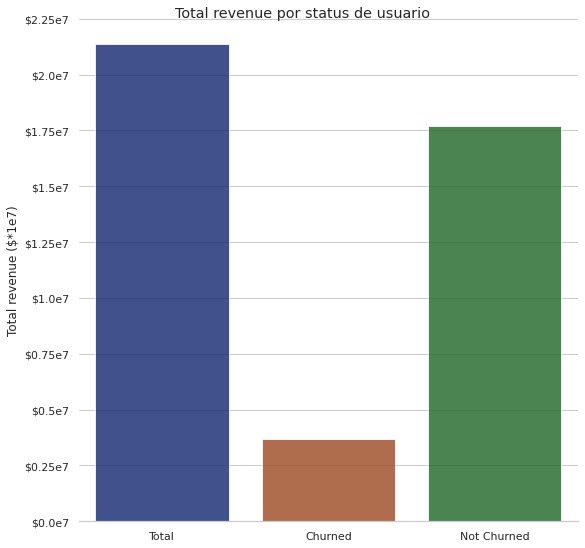

In [23]:
#@markdown ### Total reveue por status de usuario
g = sns.catplot(
    data=report_df, kind="bar",
    x='level_1', y=0,
    ci="sd", palette="dark", alpha=.8, height=8
)
g.despine(left=True)
g.set_axis_labels("", "Total revenue ($*1e7)")
g.set_yticklabels(['$0.0e7', '$0.25e7', '$0.5e7', '$0.75e7', '$1.0e7', '$1.25e7', '$1.5e7', '$1.75e7', '$2.0e7','$2.25e7'])
g.fig.suptitle("Total revenue por status de usuario")

Por lo q se ve los churned representan un 17.24% de lo que se recaudo en el Q2 2022 lo cual es una perdida bastante grande a futuro.

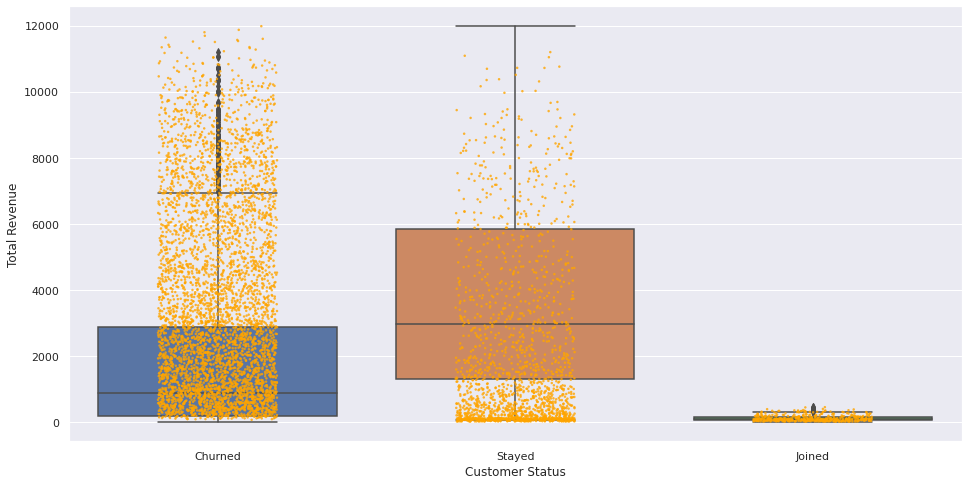

In [24]:
#@title Info del total recaudado de churned: ¿ Hay outliers ?
#churned_users['Total Revenue'].describe() #Lo comente porque lo tengo abajo en tabla
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,8))
g = sns.stripplot(x='Customer Status', y='Total Revenue', data=churn_ds, color="orange", jitter=0.2, size=2.5,ax=ax,alpha=0.8)

g = sns.boxplot(y="Total Revenue", data=churn_ds,x='Customer Status', ax = ax,order=['Churned','Stayed','Joined'])

#@markdown |Info Total Revenue|Info Total Revenue| |Info Total Revenue |
#@markdown | ---: | ---:|---: |---: |
#@markdown |Churned| Stayed || Joined |

#@markdown |            |              ||||||||
#@markdown | :---       |         ---: |---:| ---:|---:|---:|---:|---:|---:|
#@markdown | count |  1869.0|- |count|4720.00|-|count|454.00||
#@markdown | mean |  1971.35| -|mean|3735.68|-|mean|119.56||
#@markdown | std |  2438.44  | -|std|2852.94|-|std|89.47||
#@markdown | min |  21.61  | -|min|73.65|-|min|21.36||
#@markdown | 25% |  175.85  | -|25%|1307.54|-|25%|56.97||
#@markdown | 50% |  893.55  | -|50%|2960.11|-|50%|91.10||
#@markdown | 75% |  2888.76  | -|75%|5857.33|-|75%|166.24||
#@markdown | max |  11195.44  | -|max|11979.34|-|max| 456.10||

Parece que hay muchos outliers en la categoria churned pero en realidad no lo son ya que este porcentaje alto de atipicos ,por criterio intercuartil, seria marcado como normal en el grupo de stayed por ende podrian ser clientes que eran parte de los stayed en un pasado y que dejaron el servicio los cuales serian datos importantes para predecir si un cliente va a dejar o no. Por si las dudas hago un boxplot con todas las clases juntas.

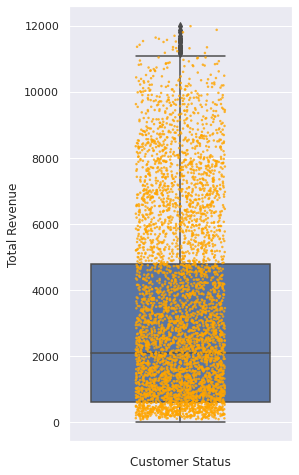

In [25]:
#@title
fig, ax = plt.subplots(figsize=(4,8))
g = sns.stripplot(x='Customer Status', y='Total Revenue', data=churn_ds, color="orange", jitter=0.2, size=2.5,ax=ax,alpha=0.8)
g = sns.boxplot(y="Total Revenue", data=churn_ds, ax = ax)
series_to_markdown_table(churn_ds['Total Revenue'].describe(),False)
#@markdown ### Info Total Revenue

|     Info Total Revenue       |             
| :---       |         

|            |              |
| :---       |         ---: |
| count |  7043.0  |
| mean |  3034.3790558000856  |
| std |  2865.2045415115304  |
| min |  21.36  |
| 25% |  605.61  |
| 50% |  2108.64  |
| 75% |  4801.145  |
| max |  11979.34  |

Se puede ver que en realidad no eran outliers.

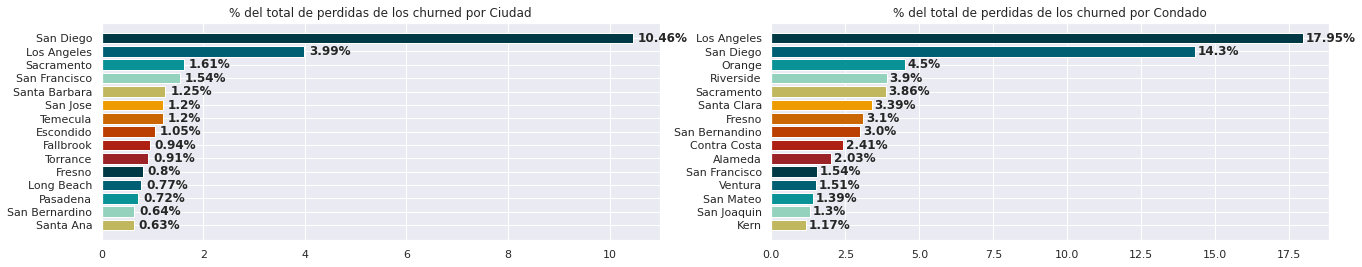

In [26]:
#@title ¿En qué ciudades se perdio mas dinero?¿Sigue el mismo patrón de ciudades que en el analisis espacial por cantidad?
#de city
churned_users.groupby('City')['Total Revenue'].sum().sort_values(ascending=False)[:15]
#valor $
churned_users.groupby('City')['Total Revenue'].sum().sort_values(ascending=False)[:15].sum()
#% de cada 1
(churned_users.groupby('City')['Total Revenue'].sum().sort_values(ascending=False)/churned_users['Total Revenue'].sum() * 100)[:15]
#%total
(churned_users.groupby('City')['Total Revenue'].sum().sort_values(ascending=False)/churned_users['Total Revenue'].sum() * 100)[:15].sum()
#de county
#Valor en $
temp_df.groupby('County')['Total Revenue'].sum().sort_values(ascending=False)[:15]
#% de cada 1
(temp_df.groupby('County')['Total Revenue'].sum().sort_values(ascending=False)/churned_users['Total Revenue'].sum() * 100)[:15]
#%total de todos
(temp_df.groupby('County')['Total Revenue'].sum().sort_values(ascending=False)/churned_users['Total Revenue'].sum() * 100)[:15].sum()

fig, ax = plt.subplots(1,2,figsize=(22,4))
ax=ax.flatten()

colors = ['#003946', '#005f73', '#0a9396', '#94d2bd', '#c1b75f', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

top_15_cities_money_percent = (churned_users.groupby('City')['Total Revenue'].sum().sort_values(ascending=False)/churned_users['Total Revenue'].sum() * 100)[:15]
top_15_county_money_percent = (temp_df.groupby('County')['Total Revenue'].sum().sort_values(ascending=False)/churned_users['Total Revenue'].sum() * 100)[:15]

ax[0].barh(top_15_cities_money_percent.index[:15],top_15_cities_money_percent[:15],color=colors)
ax[0].set_title('% del total de perdidas de los churned por Ciudad')
ax[0].invert_yaxis()
for i, v in enumerate(round(top_15_cities_money_percent[:15],2).values):
    ax[0].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

ax[1].set_title('% del total de perdidas de los churned por Condado')
ax[1].barh(top_15_county_money_percent.index[:15],top_15_county_money_percent[:15],color=colors)
ax[1].invert_yaxis()
for i, v in enumerate(round(top_15_county_money_percent[:15],2).values):
    ax[1].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

| Ciudad |Total revenue $\\$$ |Total revenue %|-|Condado|Total revenue $\\$$|Total revenue %|
| :--- |  ---: |---: |---: |---: |---: |---: |
| San Diego |  385446.39  |10.46|-|Los Angeles|661439.28|17.95
| Los Angeles |  147090.46  |3.99|-|San Diego|526844.61|14.30
| Sacramento |  59449.2  |1.61|-|Orange|165914.07|4.50
| San Francisco |  56894.27  |1.54|-|Riverside|143659.35|3.89
| Santa Barbara |  46033.71  |1.25|-|Sacramento|142144.04|3.85
| San Jose |  44393.49  |1.20|-|Santa Clara|124931.62|3.39
| Temecula |  44102.41  |1.20|-|Fresno|114294.87|3.10
| Escondido |  38869.89  |1.05|-|San Bernandino|110515.92|3.00
| Fallbrook |  34691.78  |0.94|-|Contra Costa|88821.17|2.41
| Torrance |  33534.79  |0.91|-|Alameda|74733.21|2.02
| Fresno |  29607.42  |0.80|-|San Francisco|56894.27|1.54
| Long Beach |  28550.22  |0.77|-|Ventura|55583.04|1.51
| Pasadena |  26383.57  |0.71|-|San Mateo|51298.60|1.39
| San Bernardino |  23726.13  |0.64|-|San Joaquin|47964.90|1.30
| Santa Ana |  23346.83  |0.63|-|Kern|43031.86|1.16

El patron de las ciudades y condados mas problematicos se repite al del analisis por cantidad.
>
El top 15 de ciudades solamente representa el **27,74%** del total perdido ($\\$$ 1022120.55)
>
Las Ciudades que mas dinero perdieron fueron:
* San Diego con **10,46%** del total perdido ($\\$$ 385446.39)
*  Los Angeles con **3,99%** del total perdido ($\\$$ 147090.46)
* El resto del top 15 representan entre **0.6% y 1.6%** del total perdido)
>

El top 15 de los condados representa el **65,36%** del total perdido
>
Los Condados que mas dinero perdieron fueron:
* Los Angeles con **17.95%** del total perdido ($\\$$ 661439.28)
* San Diego con **14.29%** del total perdido ($\\$$ 526844.61)
* El resto del top 15 representa entre **1,16% y 4,50%**.
Los condados mas relevantes de este resto son : Orange, Riverside,   Sacramento y Santa Clara que juntos suman alrededor del **15%** del total.

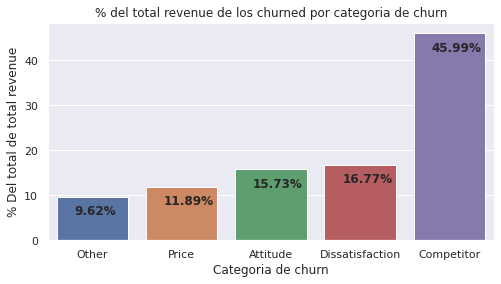

In [27]:
#@title ¿Hay alguna razon de churn que tenga mayor impacto en total revenue que las otras?
churn_category_percent = round(churned_users.groupby('Churn Category')['Total Revenue'].sum() / churned_users['Total Revenue'].sum() * 100,2)
churn_category_money = churned_users.groupby('Churn Category')['Total Revenue'].sum()

fig,ax=plt.subplots(figsize=(8,4))

g = sns.barplot(data=churn_category_percent, x=churn_category_percent.sort_values().index,y=churn_category_percent.sort_values().values, ax=ax)
g.set_xticklabels(churn_category_percent.sort_values().index)
g.set_ylabel('% Del total de total revenue')
g.set_xlabel('Categoria de churn')
g.set_title('% del total revenue de los churned por categoria de churn')
for i, v in enumerate(round(churn_category_percent.sort_values(),2).values):
    ax.text(i-0.2 ,v-4 , str(v)+'%', fontweight='bold')
plt.show()

|   Churn Categoty         |       Total Revenue $ $\$       |
| :---       |         ---: |
| Competitor |  1694413.15  |
| Dissatisfaction |  617979.26  |
| Attitude |  579554.13  |
| Price |  438124.14  |
| Other |  354389.14  |

Se puede ver que la competencia es la razon principal cuasando 46% de las perdidas monetarias, seguida por la actitud del soporte y dissatisfaccion del servicio sumando alrededor de 32% entre ellas.
Veamos cuales son las razones dentro de estos 3 grupos que mas impacto tienen.

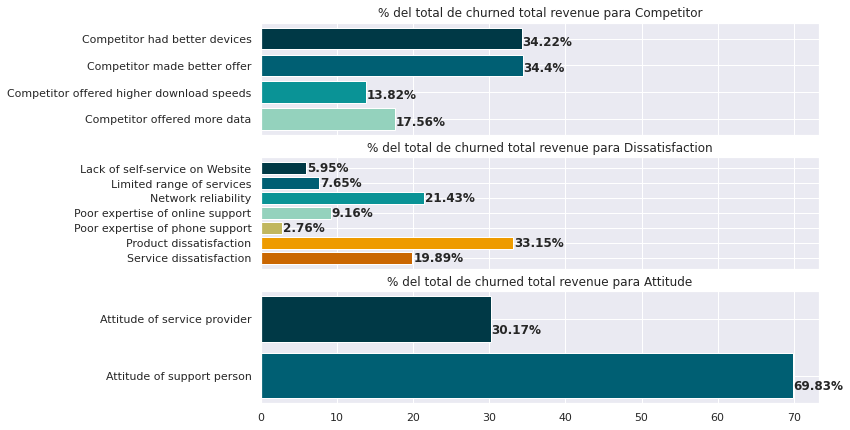

In [28]:
#@title ¿Cuales son las razones de cada categoria de churn que nos hacen perder mas dinero?

categorias=['Competitor','Dissatisfaction','Attitude']

fig, ax = plt.subplots(len(categorias),1,figsize=(10,7),sharex=True)
ax=ax.flatten()

colors = ['#003946', '#005f73', '#0a9396', '#94d2bd', '#c1b75f', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

for j,razon in enumerate(categorias):
  cond = churned_users['Churn Category']==razon
  #valor $
  valor_dolar_por_razon = churned_users[cond].groupby('Churn Reason')['Total Revenue'].sum()
  # % 
  valor_porcentaje_por_razon= churned_users[cond].groupby('Churn Reason')['Total Revenue'].sum() / churned_users[cond]['Total Revenue'].sum() * 100

  ax[j].barh(valor_porcentaje_por_razon.index,valor_porcentaje_por_razon,color=colors)
  ax[j].set_title(f'% del total de churned total revenue para {razon}')
  ax[j].invert_yaxis()
  for i, v in enumerate(round(valor_porcentaje_por_razon,2).values):
      ax[j].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

# for cat in categorias:
#   cond = churned_users['Churn Category']==cat
#   #valor $
#   valor_dolar_por_razon = churned_users[cond].groupby('Churn Reason')['Total Revenue'].sum()
#   series_to_markdown_table(valor_dolar_por_razon.sort_values(ascending = False))

Veamos categoria por categora:
* Competencia:
  Las 2 razones que predominan, practicamente empatadas son:
  - Ofrecen mejores dispositivos.
  - Tienen mejores ofertas.
* Dissatisfacción:
  Las 3 razones que predominan que equivalen al ~63% de las perdidas de esta categoria son:
  - Dissatisfaccion con el producto
  - Estabilidad de la red
  - Dissatisfaccion con el servicio
* Actitud:
  - El 70% de las perdidas de esta categoria provienen de la actitud de personas de soporte.
  - El 30% proviene de la actitud del proovedor del servicio

Dejo aca las tablas por si quieren ver cuando dinero representa cada categoría.

>
|   Competencia         |              
| :---       |        

|     Razon       |    Total revenue $\\$$          |
| :---       |         ---: |
| Competitor made better offer |  582822.2  |
| Competitor had better devices |  579877.05  |
| Competitor offered more data |  297568.21  |
| Competitor offered higher download speeds |  234145.69  |
>
|   Dissatisfacción         |              
| :---       |   

|    Razon        |    Total revenue $\\$$            |
| :---       |         ---: |
| Product dissatisfaction |  204875.74  |
| Network reliability |  132443.67  |
| Service dissatisfaction |  122914.14  |
| Poor expertise of online support |  56617.14  |
| Limited range of services |  47254.43  |
| Lack of self-service on Website |  36788.15  |
| Poor expertise of phone support |  17085.99  |
>
|   Actitud         |              
| :---       |   

|      Razon      |   Total revenue $\\$$            |
| :---       |         ---: |
| Attitude of support person |  404695.39  |
| Attitude of service provider |  174858.74  |

## Comparacion churned vs stayed

Como el dataset esta desbalanceado voy a trabajar con % poblacionales en vez de cantidades numericas

In [42]:
#@markdown Identifico las columnas categoricas y las numericas

categorical_cols=[]
numerical_cols=[]

for col in churn_stayed_df.columns:
  if churn_stayed_df[col].dtypes.str=='|O':
    categorical_cols.append(col)
  else:
    numerical_cols.append(col)

print(f'Categorical:\n{categorical_cols}\nNumerical:\n{numerical_cols}')

Categorical:
['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason']
Numerical:
['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


In [43]:
#@markdown Saco las columnas que no voy a analizar en esta parte ('Latitude', 'Longitude','City','Customer Status')
numerical_cols.remove('Latitude')
numerical_cols.remove('Longitude')
numerical_cols.remove('Zip Code')

categorical_cols.remove('City')
categorical_cols.remove('Customer Status')
categorical_cols.remove('Customer ID')
categorical_cols.remove('Churn Reason')
categorical_cols.remove('Churn Category')


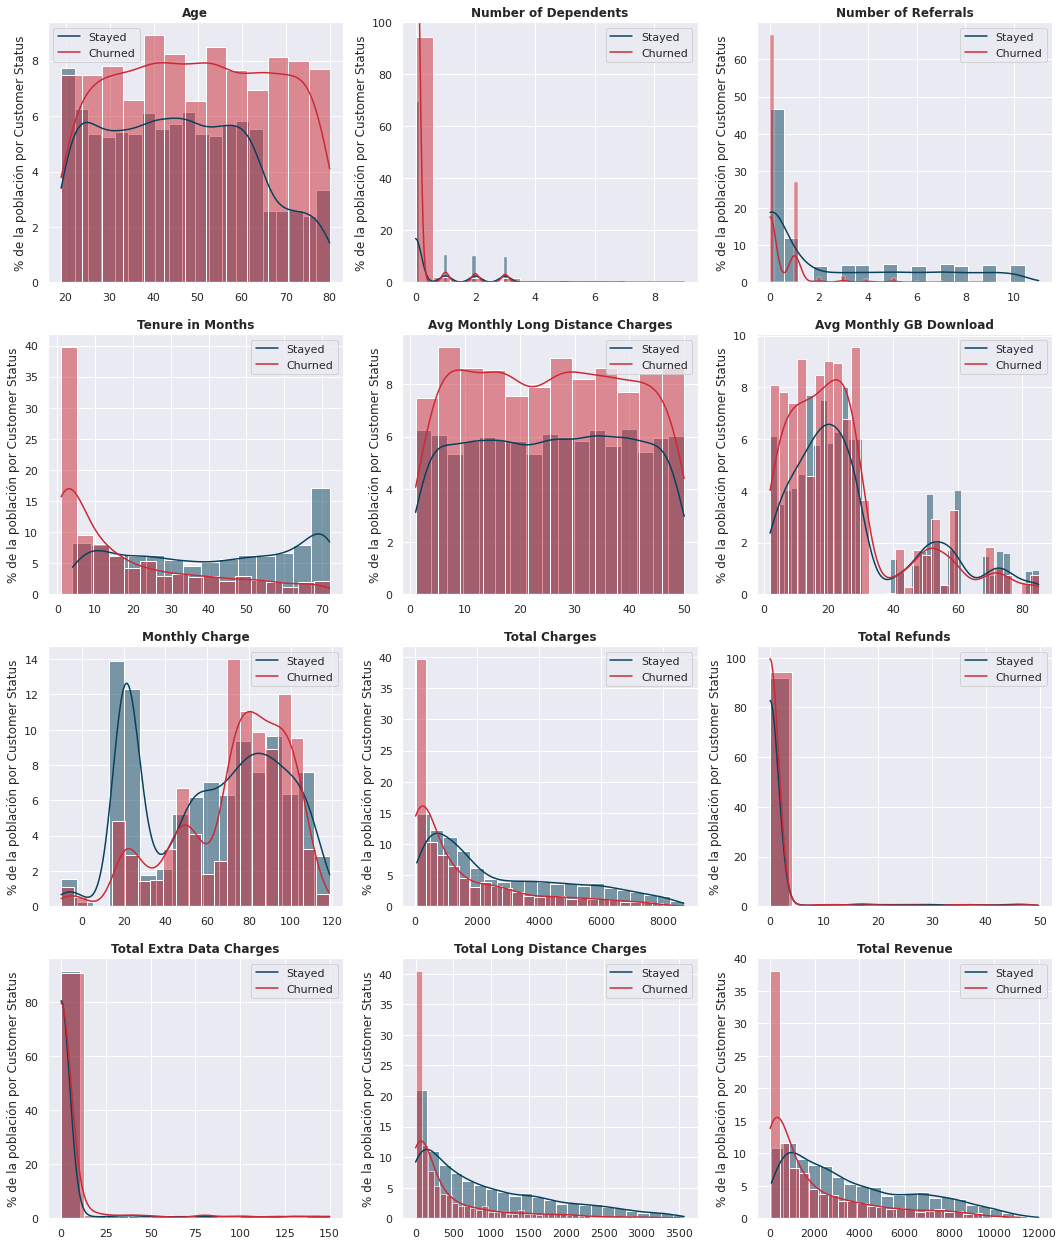

In [44]:
#@title ¿Hay alguna tendencia en las columnas numericas?¿Diferencias entre los churned y stayed?
stayed_users = churn_ds[churn_ds['Customer Status']=='Stayed']
numerical_cols=['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

ROWS, COLS = 4, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 22))
row, col = 0, 0

GRAFICO_A_COLOR = True #@param {type:'boolean'}

for i, num_col in enumerate(numerical_cols):
  if col == COLS - 1:
      row += 1
  col = i % COLS

  g= sns.histplot(data=stayed_users,x=num_col,hue='Customer Status',stat='percent',ax=ax[row, col],kde=True,kde_kws={'cut':0},palette=sns.color_palette(["#08415c"],1,desat=GRAFICO_A_COLOR))
  if row == 0 and col == 1:
    g.set_ylim(0,100)
  g.set_ylabel('')
  g= sns.histplot(data=churned_users,x=num_col,hue='Customer Status',stat='percent',ax=ax[row, col],kde=True,kde_kws={'cut':0},palette=sns.color_palette(["#cc2936"],1,desat=GRAFICO_A_COLOR))
  if row == 0 and col == 1:
    g.set_ylim(0,100)

  g.set_xlabel('')
  g.set_ylabel('% de la población por Customer Status')

  title=textwrap.fill(num_col, width=40,
                      break_long_words=False)
  g.set_title(title,fontdict={
 'fontweight': 'bold',
})
  ax[row, col].legend(labels=['Stayed', 'Churned'])  

plt.show()

Si las hay.

### Patrones y tendencias de los churned:
* Las personas mayores a 60 años tienden a dejar el servicio que a quedarse.(en un ratio churn-stayed aprox de 2:1)
* Los grupos entre 40 a 60 años son los de mayor volumen y por eso tambien son los que mas cantidad de churned tienen (aprox hay 1 churned por cada stayed)

* Mientras menos personas dependan del cliente mas chances tiene de dejar el servicio.
* Lo mismo ocurre con los referals, mientras menos referals tengan mas chances hay de que dejen el servicio.
* Mientras mas tiempo lleven en el servicio menos chances tienen de dejarlo.
* A la mayor parte de los churned pagaban una tarifa mensual entre 70-110 dolares.

### Otros factores a tener en cuenta
* Los picos que se ven de 0 en el promedio mensual de GB y cargos mensuales por llamadas a distancia se deben a como decidi rellenar los nulos que si bien tiene sentido ya que no usan esos servicios, lo aclaro porque puede distraer.
* La mayoria de las personas entre 20-25 se quedan en el servicio (se comporta de forma inversa a los mayores de 60)

## 6. Comparación churned por categorias Parte 1, generalidades.

In [45]:
#@markdown Como estube tocando al rellenar nulos voy a hacer lo siguiente: Voy a analizar las categorias en general sin entrar en detalle en los servicios telefonicos e internet y luego voy a trabajar con estos en otro grafico usando solo los que si contrataron un servicio u otro, con el fin de evitar un bias a 'No' en las "subcategorias" de cada servicio

general_categorical_cols = categorical_cols[:4] + ['Internet Service'] + categorical_cols[-3:]
phone_cols = [categorical_cols[4]]
internet_cols = categorical_cols[6:-3]

print(f'General Cols\n{general_categorical_cols}\nPhone cols\n{phone_cols}\nInternet cols\n{internet_cols}')

General Cols
['Gender', 'Married', 'Offer', 'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing', 'Payment Method']
Phone cols
['Multiple Lines']
Internet cols
['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']


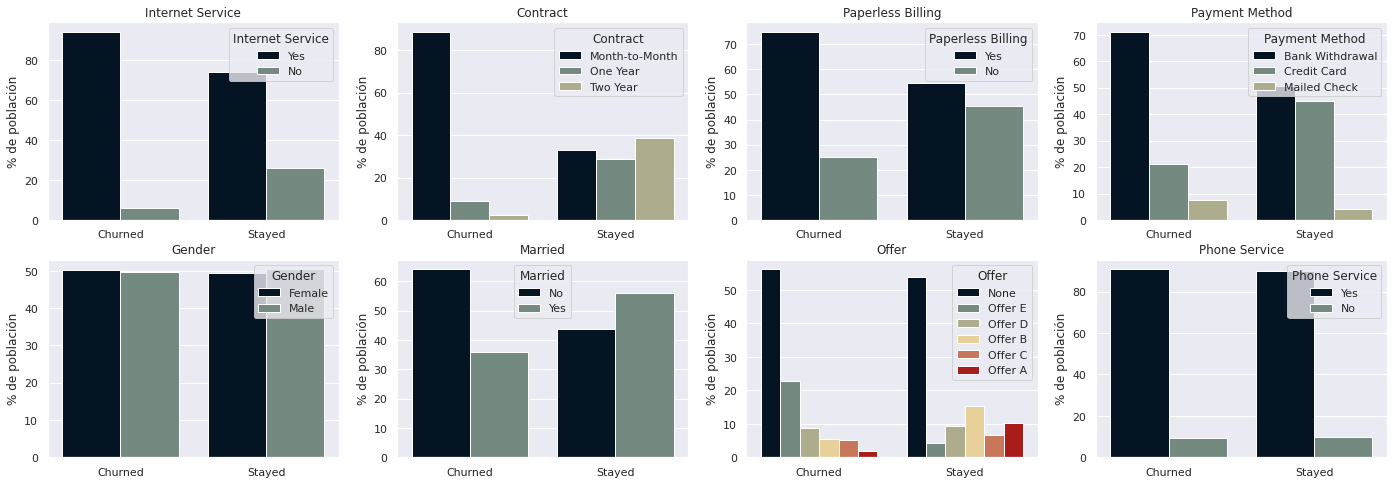

In [46]:
#@title ¿Hay alguna columna categorica en la cual se muestre una tendencia a churn?
GRAFICO_A_COLOR = True #@param {type:'boolean'}

colors=["#001427","#708d81","#b2b187","#f4d58d","#da6e48","#bf0603","#8d0801"]
palette=sns.color_palette(colors,desat=GRAFICO_A_COLOR)

ROWS, COLS = 2, 4
row=0

fig, ax = plt.subplots(ROWS, COLS, figsize=(24, 8))

for i, cat_col in enumerate(general_categorical_cols):
  if col == COLS - 1:
      row += 1
  col = i % COLS
  y,x=cat_col,'Customer Status'

  (churn_stayed_df
  .groupby(x)[y]
  .value_counts(normalize=True)
  .mul(100)
  .rename('percent')
  .reset_index()
  .pipe((sns.barplot,'data'), x=x,y='percent',hue=y, ax=ax[row-1,col],palette=palette))
  ax[row-1,col].set_ylabel('% de población')
  ax[row-1,col].set_xlabel('')
  ax[row-1,col].set_title(cat_col)


De acuerdo a los graficos, tienden a dejar el servicio:

* Los usuarios con servicio a internet 
* Los que tienen un contrato mes a mes
* Los que se les cobra en papel
* Los que pagan por medio del banco
* Los que pagan la oferta E tienen una gran chance de dejarlo
* Los solteros.

## Comparación de churned por categorias Parte 2, servicios de internet y telefono.

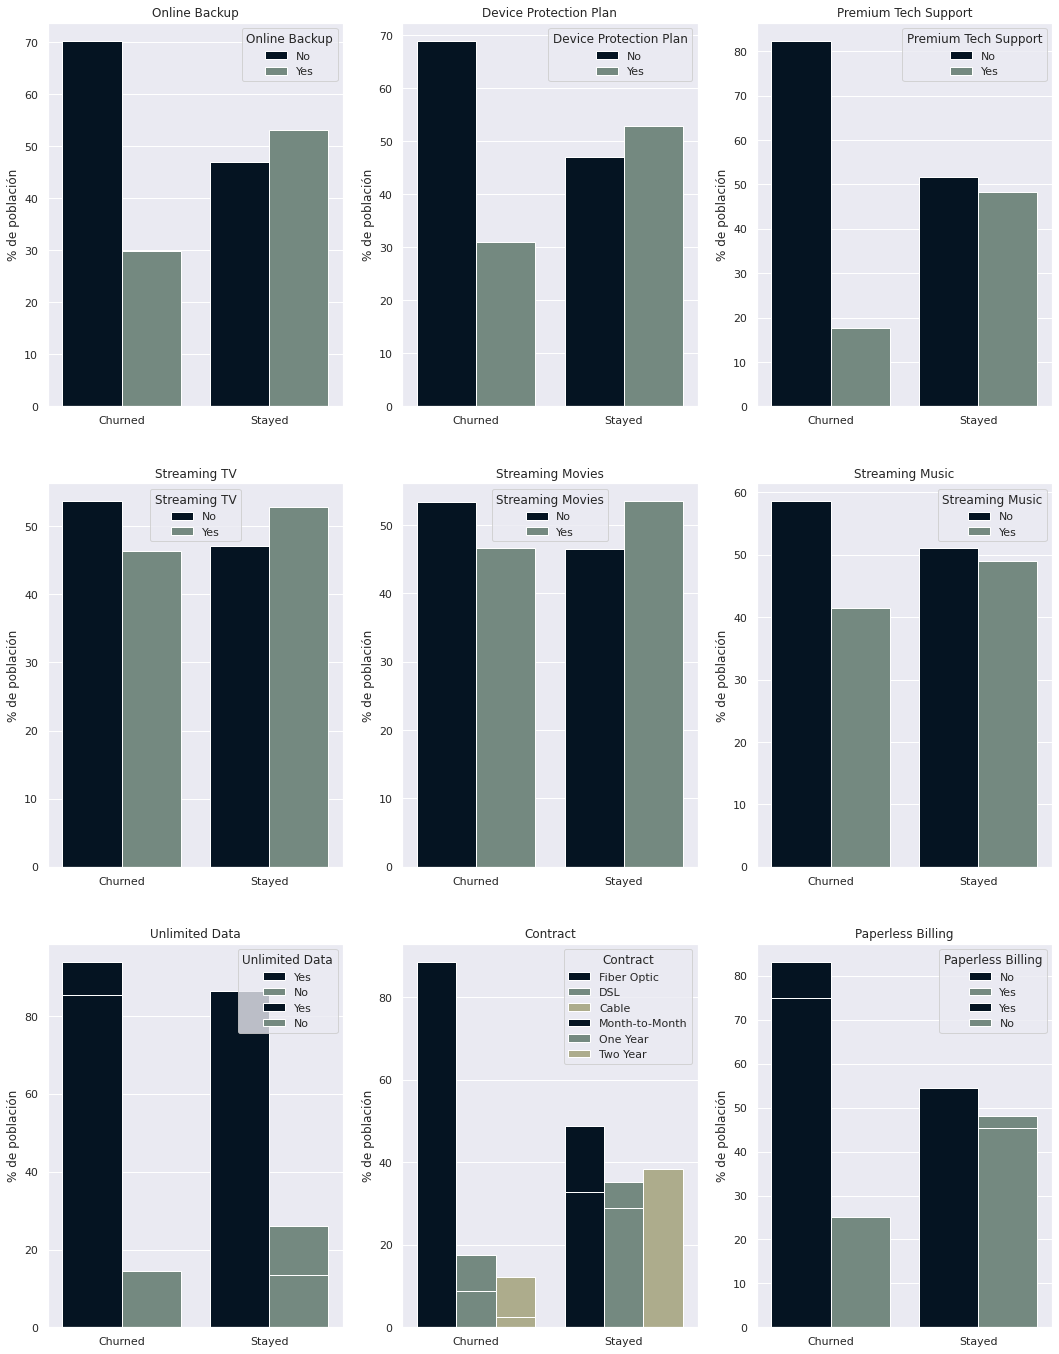

In [35]:
#@title ¿Hay algun servicio que ofrecemos cause mas churned?¿Hay alguno que tenga mejor retencion?
GRAFICO_A_COLOR=True #@param {type:'boolean'}
colors=["#001427","#708d81","#b2b187","#f4d58d","#da6e48","#bf0603","#8d0801"]
palette=sns.color_palette(colors,desat=GRAFICO_A_COLOR)

ROWS, COLS = 3, 3
row=0

fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 24))

for i, cat_col in enumerate(internet_cols):
  if col == COLS - 1:
      row += 1
  col = i % COLS
  y,x=cat_col,'Customer Status'

  (churn_stayed_df
  .groupby(x)[y]
  .value_counts(normalize=True)
  .mul(100)
  .rename('percent')
  .reset_index()
  .pipe((sns.barplot,'data'), x=x,y='percent',hue=y, ax=ax[row-1,col],palette=palette))
  ax[row-1,col].set_ylabel('% de población')
  ax[row-1,col].set_xlabel('')
  ax[row-1,col].set_title(cat_col)

Por lo que se puede ver, los servicios de fibra optica , datos ilimitados y streaming de tv y peliculas tienen mayor cantidad de churned por usuario.
  * Parece que hay problemas con la fibra optica, pueden provenir por ser uno de los servicios de internet mas comunes ofrecidos causando que haya mas volumen, asi como tambien puede proveenir de las fallas e inestabilidad en la red.
  * Por los datos ilimitados no creo que sea un problema sino que , al igual que la fibra optica, son los mas comunes a ofrecer.
  * En el caso de los servicios de streaming de peliculas y tv, se puede deber al catálogo de las mismas y/o a inestabilidades en el servicio.Habria que conseguir datos de los mismos para entrar en detalle al por qué.

Por otro lado los usuarios que contratan DSL, Servicio premium de soporte y el servicio de seguridad online tienden a quedarse asi que esos deben funcionar como deben.

La columna telefónica no es relevante como para analizar ya que solo habla de si tienen multiples lineas o no.

# 6. Preparacion de datos para el modelo

## Balanceando el dataset

Decidi balancear el dataset por medio de oversampling usando SMOTENC de la libreria imblearn ya que si bien era mas facil tomar una muestra al azar ,del tamaño de los churned, de los stayed podria estar perdiendo datos valiosos en especial siendo que el dataset no es excesivamente grande para este problema como para considerarlo.

In [ ]:
#@title creando el dataframe que va a ser pasado por el algoritmo.

stayed_users =  churn_ds.loc[churn_ds['Customer Status']=='Stayed']

churned_stayed_df = pd.concat([churned_users,stayed_users]).reset_index(drop=True).copy()

#quito columnas de metadatos y las que no me sirvan para la siguiente parte
churned_stayed_df.drop(['Customer ID','Zip Code','Churn Category','Churn Reason'],axis=1,inplace=True)

#guardo el indice de las categoricas porque lo tengo que usar para hacer oversampling
categorical_idx = []
for i,col in enumerate(churned_stayed_df.columns):
  if churned_stayed_df[col].dtypes.str=='|O':
    categorical_idx.append(i)
    print(f'{col}: {i}')



### Limpiando nulos

Tengo que hacerlo ya que algoritmo de SMOTENC me pide que no haya nulos en el dataframe de input.

In [ ]:
#@title Veamos los nulos
churned_stayed_df.isna().sum()

In [ ]:
#@markdown Por info del dataset en teoria las columnas con nulos se deben a que no tenian el servicio. Verifico
#@markdown > 
#@markdown No deberia haber nulos en las columnas 'Avg Monthly Long Distance Charges' y 'Multiple Lines' si tienen servicio telefonico como 'Yes'.
cond = (churned_stayed_df['Phone Service']=='Yes')
churned_stayed_df[cond][['Avg Monthly Long Distance Charges','Multiple Lines']].isna().sum()

In [ ]:
#@markdown Misma situacion para los servicios de internet, si tienen servicio, las columnas relacionadas no deberian tener nulos.
cond = (churned_stayed_df['Internet Service']=='Yes')
churned_stayed_df[cond][['Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']].isna().sum()

In [ ]:
#@title Lleno nulos para poder pasarlo por SMOTENC
#@markdown Ok se verifica relleno los nulos con lo que me parece correcto Numericas -> 0 , Categoricas -> No (como son todas binarias y no tienen el servicio es lo q me parece mas correcto)
#@markdown en el caso de Internet type decido llenarlo tambien con No ya que quedaria diferenciado de los otros tipos como un "No tiene" y para el uso de los ejercicios creo que es mas que suficiente.
categorical_cols=['Multiple Lines','Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']

numerical_cols=['Avg Monthly GB Download','Avg Monthly Long Distance Charges']

for col in categorical_cols:
  churned_stayed_df[col].fillna('No',inplace=True)
for col in numerical_cols:
  churned_stayed_df[col].fillna(0,inplace=True)

churned_stayed_df.isna().sum()

### Balanceando el dataset

In [ ]:
#@title Divido el dataset en target y features.
y = churned_stayed_df.pop('Customer Status')
X = churned_stayed_df

print(f'Shape X: {X.shape}\nShape y:{y.shape}')

In [ ]:
#@title Importo SMOTENC y lo aplico
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=categorical_idx[0:len(categorical_idx)-1],sampling_strategy='minority', random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

len(X_resampled),len(y_resampled),len(churned_stayed_df),len(churned_users),len(stayed_users)

In [ ]:
#@markdown Verifico la cantidad de stayed y de churned.
balanced_df = pd.concat([X_resampled,y_resampled],axis=1)
len(balanced_df.loc[balanced_df['Customer Status']=='Stayed']), len(balanced_df.loc[balanced_df['Customer Status']=='Churned'])